# Análisis Exploratorio de Datos (EDA)

In [96]:
import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

###  Bases Cartográficas de Radios Censales

In [97]:
# Cargamos los datos espaciales
gdf = gdp.read_file("/home/santiago/Documents/TUPED/PPS/Práctica Profesional Supervisada/data/external/radios/radios2022_v1.0.shp")

In [98]:
# Este GeoDataFrame tiene información geoespacial de los radios censales y demas atributos
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 66502 entries, 0 to 66501
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   NOMPROV   66502 non-null  object  
 1   PROV      66502 non-null  object  
 2   NOMDEPTO  66502 non-null  object  
 3   DEPTO     66502 non-null  object  
 4   FRAC      66502 non-null  object  
 5   RADIO     66502 non-null  object  
 6   TIPO      66487 non-null  object  
 7   LINK      66502 non-null  object  
 8   OBS2020   19 non-null     object  
 9   geometry  66502 non-null  geometry
dtypes: geometry(1), object(9)
memory usage: 5.1+ MB


Aca limitamos a los datos del DEPARTAMENTO Rosario

In [99]:
rosario = gdf[gdf["NOMDEPTO"] == "Rosario"]

In [100]:
# Vemos los valores unicos de las las variables
print("NOMPROV",rosario['NOMPROV'].unique())
print("PROV",rosario['PROV'].unique())
print("NOMDEPTO",rosario['NOMDEPTO'].unique())
print("DEPTO",rosario['DEPTO'].unique())
print("FRAC",rosario['FRAC'].unique())
print("RADIO",rosario['RADIO'].unique())
print("TIPO",rosario['TIPO'].unique())
print("LINK",rosario['LINK'].unique())
print("OBS2020",rosario['OBS2020'].unique())
#print("geometry",rosario['geometry'].unique())

NOMPROV ['SANTA FE']
PROV ['82']
NOMDEPTO ['Rosario']
DEPTO ['084']
FRAC ['02' '03' '20' '21' '06' '07' '31' '32' '49' '50' '63' '01' '04' '05'
 '08' '09' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '22' '23'
 '24' '25' '26' '27' '28' '29' '30' '33' '34' '35' '36' '37' '38' '39'
 '40' '41' '42' '64' '43' '44' '45' '46' '47' '48' '51' '52' '53' '54'
 '55' '56' '57' '58' '59' '60' '61' '62' '65' '66' '67' '68' '69' '70'
 '71' '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84'
 '85' '86' '87' '88' '89' '90' '95']
RADIO ['16' '18' '21' '22' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '11' '12' '13' '14' '15' '17' '19' '20' '23' '24' '25' '26' '27' '28'
 '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42'
 '43' '44' '45' '46']
TIPO ['U' 'M' 'R']
LINK ['820840216' '820840218' '820840221' ... '820840220' '820840219'
 '820848814']
OBS2020 [None]


#### Agregamos dos nuevas variables que representan los códigos de las 'Fracciones' y de los 'Radios Censales'    

Aca estariamos reconstruyendo las variables necesarias para posteriormente fusionar estos datos espaciales con los datos censales.

In [101]:
# Variables de identificación geográfica de Fraccion Censal
gdf['CodigoFraccion'] = (
    gdf['PROV'].astype(str).str.zfill(2) +
    gdf['DEPTO'].astype(str).str.zfill(3) +
    gdf['FRAC'].astype(str).str.zfill(2) 
)

# Variables de identificación geográfica de Radio Censal
gdf['CodigoRadioCensal'] = (
    gdf['PROV'].astype(str).str.zfill(2) +
    gdf['DEPTO'].astype(str).str.zfill(3) +
    gdf['FRAC'].astype(str).str.zfill(2) +
    gdf['RADIO'].astype(str).str.zfill(2)
)

In [102]:
gdf[['CodigoFraccion','CodigoRadioCensal']].head(5)

CodigoFraccion CodigoRadioCensal
0        0200701         020070101
1        0200702         020070210
2        0200709         020070909
3        0202819         020281906
4        0202819         020281907

Estos datos de las fracciones censales fueron brindados por la **Dirección de Estadistica**, previo a un trabajo manual de seleccion de dichas fracciones para identificar cuales corresponden con la ciudad de Rosario.

In [103]:
# Aca tomamos los Codigos de los Fracciones Censales de Rosario. 
with open("../data/external/fracciones_censales_rosario.txt", "r", encoding="utf-8") as f:
    lineas = f.readlines()

# Extraemos los códigos numéricos de cada línea (fracciones censales)
codigos_ciudad_rosario = [re.search(r"\d+", linea).group() for linea in lineas if re.search(r"\d+", linea)]

print(codigos_ciudad_rosario)

['8208403', '8208404', '8208405', '8208406', '8208407', '8208408', '8208409', '8208410', '8208411', '8208412', '8208413', '8208414', '8208415', '8208416', '8208417', '8208418', '8208419', '8208420', '8208421', '8208422', '8208423', '8208424', '8208425', '8208426', '8208427', '8208428', '8208429', '8208430', '8208431', '8208432', '8208433', '8208434', '8208435', '8208436', '8208437', '8208438', '8208439', '8208440', '8208441', '8208442', '8208443', '8208444', '8208445', '8208446', '8208447', '8208448', '8208449', '8208450', '8208451', '8208452', '8208453', '8208454', '8208455', '8208456', '8208480', '8208481', '8208482', '8208483', '8208484', '8208485', '8208486', '8208487']


In [104]:
# Filtramos el GeoDataFrame
gdf_rosario_filtrado = gdf[gdf['CodigoFraccion'].isin(codigos_ciudad_rosario)]
gdf_rosario_filtrado.head()

NOMPROV PROV NOMDEPTO DEPTO FRAC RADIO TIPO       LINK OBS2020  \
57892  SANTA FE   82  Rosario   084   03    01    U  820840301    None   
57893  SANTA FE   82  Rosario   084   03    02    U  820840302    None   
57894  SANTA FE   82  Rosario   084   03    03    U  820840303    None   
57895  SANTA FE   82  Rosario   084   03    04    U  820840304    None   
57896  SANTA FE   82  Rosario   084   03    05    U  820840305    None   

                                                geometry CodigoFraccion  \
57892  POLYGON ((-60.74758 -32.89534, -60.75633 -32.8...        8208403   
57893  POLYGON ((-60.73798 -32.87591, -60.73794 -32.8...        8208403   
57894  POLYGON ((-60.72183 -32.88329, -60.7218 -32.88...        8208403   
57895  POLYGON ((-60.73305 -32.88559, -60.73543 -32.8...        8208403   
57896  POLYGON ((-60.71966 -32.88779, -60.71972 -32.8...        8208403   

      CodigoRadioCensal  
57892         820840301  
57893         820840302  
57894         820840303  
57895         820840304  
57896         820840305

Vemos entonces que en Rosario hay 1537 radios censales totales.

In [105]:
gdf_rosario_filtrado.info() #1537 radios censales en la ciudad de Rosario

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1537 entries, 57892 to 61986
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   NOMPROV            1537 non-null   object  
 1   PROV               1537 non-null   object  
 2   NOMDEPTO           1537 non-null   object  
 3   DEPTO              1537 non-null   object  
 4   FRAC               1537 non-null   object  
 5   RADIO              1537 non-null   object  
 6   TIPO               1537 non-null   object  
 7   LINK               1537 non-null   object  
 8   OBS2020            0 non-null      object  
 9   geometry           1537 non-null   geometry
 10  CodigoFraccion     1537 non-null   object  
 11  CodigoRadioCensal  1537 non-null   object  
dtypes: geometry(1), object(11)
memory usage: 156.1+ KB


Text(0.5, 1.0, 'Radios Censales de la Ciudad de Rosario')

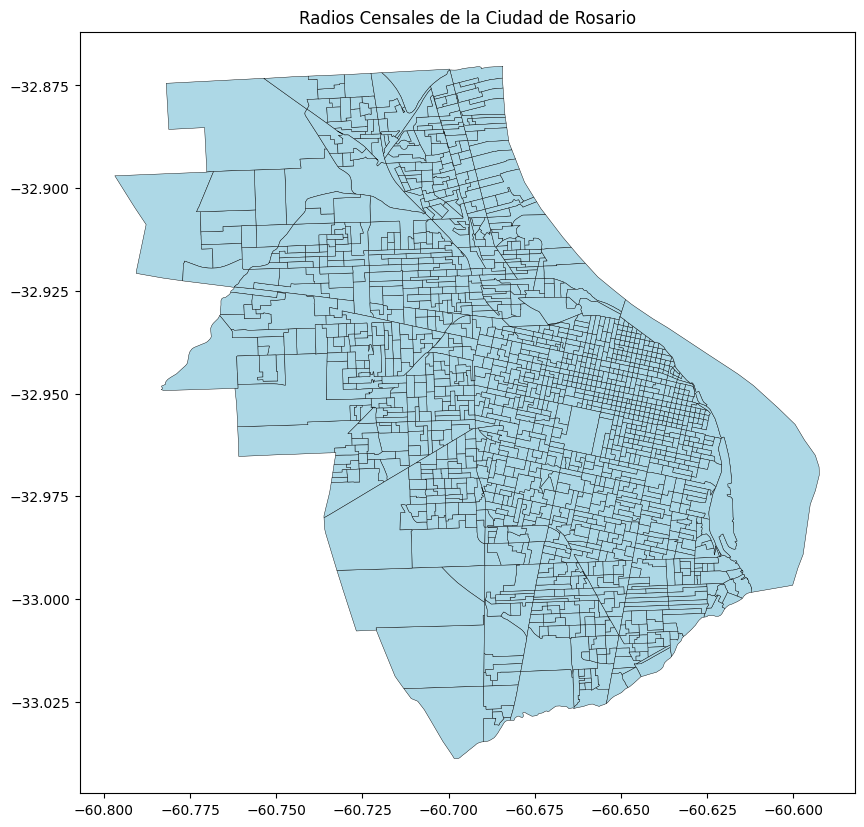

In [106]:
# Graficamos los radios censales de la ciudad de Rosario
gdf_rosario_filtrado.plot(figsize=(10, 10), color='lightblue', edgecolor='black', linewidth=0.3)
plt.title("Radios Censales de la Ciudad de Rosario")

--------------------------------------------------


## Datos del Censo Nacional de Población, Hogares y Viviendas 2022

Estos datos fueron extraidos del [Portal Redatam](https://redatam.indec.gob.ar/binarg/RpWebEngine.exe/Portal?BASE=CPV2022&lang=ESP), seleccionamos la base de datos de __viviendas particulares__ y los siguientes indicadores:
- Necesidates Básicas Insatisfecha (__NBI__) 
- Indice de Privación Materiales de los Hogares (__IPMH__)

-----------------------------

[Definiciones y conceptos utilizados en los cuadros - INDEC](https://www.indec.gob.ar/ftp/indecinforma/nuevaweb/cuadros/7/sesd_glosario.pdf)

De __NBI__ se consideran hogares con Necesidades básicas Insatisfechas aquellos en los cuales está presente al menos uno de los siguientes indicadores de privación:
- __NBI Vivienda__: son los hogares que viven en habitaciones de inquilinato, hotel o pensión, viviendas no destinadas a fi nes habitacionales, viviendas precarias y otro tipo de vivienda. Se excluye a las viviendas tipo casa, departamento y rancho.

- __NBI Condiciones sanitarias__: incluye a los hogares que no poseen retrete

- __NBI Hacinamiento__:  es la relación entre la cantidad total de miembros del hogar y la cantidad de habitaciones de uso exclusivo del hogar. Operacionalmente se considera que existe hacinamiento crítico cuando en el hogar hay más de tres personas por cuarto.

- __NBI Escolaridad__: hogares que tienen al menos un niño en edad escolar (6 a 12 años) que no asiste a la escuela.

- __NBI Capacidad de subsistencia__: incluye a los hogares que tienen cuatro o más personas por miembro ocupado y tienen un jefe que no ha completado el tercer grado de escolaridad primaria.

[INDICE DE PRIVACION MATERIAL DE LOS HOGARES (IPMH)](https://www.santafe.gov.ar/index.php/web/content/download/52879/258721/file/IPMH.pdf)

La variable __IPMH__ identifica a los hogares según su situación respecto a la privación material considerando dos dimensiones: __recursos corrientes__ y __patrimonial__. La combinación de estas dimensiones define cuatro grupos de hogares:

Aquellos que no presentan ningún tipo de privación:
- 'Sin_IPMH'

y tres grupos diferenciados según el tipo de privación que presentan:
- 'IPMH_Solo_Recursos_Corrientes'
- 'IPMH_Solo_Recursos_Patrimoniales'
- 'IPMH_Convergente' 

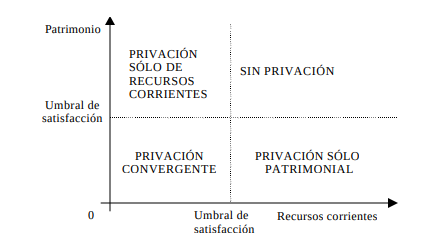

In [107]:
# Leemos los datos censales recolectados del portal REDATAM
datos_censales = pd.read_csv("../data/raw/datos_censales_redatam.csv")

In [108]:
datos_censales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   CodigoRadioCensal                 1537 non-null   int64
 1   NBI_Hacinamiento_Si               1537 non-null   int64
 2   NBI_Hacinamiento_No               1537 non-null   int64
 3   NBI_Vivienda_Si                   1537 non-null   int64
 4   NBI_Vivienda_No                   1537 non-null   int64
 5   NBI_Sanitarias_Si                 1537 non-null   int64
 6   NBI_Sanitarias_No                 1537 non-null   int64
 7   NBI_Escolaridad_Si                1537 non-null   int64
 8   NBI_Escolaridad_No                1537 non-null   int64
 9   NBI_Subsistencia_Si               1537 non-null   int64
 10  NBI_Subsistencia_No               1537 non-null   int64
 11  NBI_Si                            1537 non-null   int64
 12  NBI_No                            

In [109]:
datos_censales.head(10)

CodigoRadioCensal  NBI_Hacinamiento_Si  NBI_Hacinamiento_No  \
0          820840301                   28                  239   
1          820840302                    2                  283   
2          820840303                    9                  231   
3          820840304                   10                  429   
4          820840305                    4                  239   
5          820840306                    8                  343   
6          820840307                    0                  201   
7          820840308                    8                  222   
8          820840309                    2                  205   
9          820840310                   17                  215   

   NBI_Vivienda_Si  NBI_Vivienda_No  NBI_Sanitarias_Si  NBI_Sanitarias_No  \
0               14              253                  7                260   
1                1              284                  0                285   
2                6              234                  1                239   
3                6              433                  5                434   
4                3              240                  2                241   
5                5              346                  3                348   
6                0              201                  0                201   
7                6              224                  8                222   
8                1              206                  0                207   
9                4              228                  1                231   

   NBI_Escolaridad_Si  NBI_Escolaridad_No  NBI_Subsistencia_Si  \
0                   3                 264                    5   
1                   1                 284                    1   
2                   0                 240                    2   
3                   3                 436                    3   
4                   4                 239                    0   
5                   1                 350                    3   
6                   1                 200                    0   
7                   2                 228                    2   
8                   0                 207                    0   
9                   4                 228                    2   

   NBI_Subsistencia_No  NBI_Si  NBI_No  Sin_IPMH  \
0                  262      52     215        35   
1                  284       5     280       167   
2                  238      16     224       135   
3                  436      23     416       271   
4                  243      13     230       147   
5                  348      18     333       203   
6                  201       1     200       175   
7                  228      24     206       122   
8                  207       3     204       138   
9                  230      26     206        70   

   IPMH_Solo_Recursos_Corrientes  IPMH_Solo_Recursos_Patrimoniales  \
0                             15                               117   
1                             37                                56   
2                             58                                25   
3                             62                                59   
4                             42                                35   
5                             68                                45   
6                             20                                 4   
7                             24                                33   
8                             42                                12   
9                             53                                55   

   IPMH_Convergente  Total Hogares  
0               100            267  
1                25            285  
2                22            240  
3                47            439  
4                19            243  
5                35            351  
6                 2            201  
7                51            230  
8                15     

In [110]:
# Ver cuántos NaN hay en cada columna
print("NaN por columna:")
print(datos_censales.isnull().sum())

NaN por columna:
CodigoRadioCensal                   0
NBI_Hacinamiento_Si                 0
NBI_Hacinamiento_No                 0
NBI_Vivienda_Si                     0
NBI_Vivienda_No                     0
NBI_Sanitarias_Si                   0
NBI_Sanitarias_No                   0
NBI_Escolaridad_Si                  0
NBI_Escolaridad_No                  0
NBI_Subsistencia_Si                 0
NBI_Subsistencia_No                 0
NBI_Si                              0
NBI_No                              0
Sin_IPMH                            0
IPMH_Solo_Recursos_Corrientes       0
IPMH_Solo_Recursos_Patrimoniales    0
IPMH_Convergente                    0
Total Hogares                       0
dtype: int64


In [111]:
# Chequeamos los codigos antes del merge
print("Códigos en gdf_rosario_filtrado (primeros 5):")
print(gdf_rosario_filtrado['CodigoRadioCensal'].head().tolist())

print("\nCódigos en datos_censales (primeros 5):")
print(datos_censales['CodigoRadioCensal'].head().tolist())

Códigos en gdf_rosario_filtrado (primeros 5):
['820840301', '820840302', '820840303', '820840304', '820840305']

Códigos en datos_censales (primeros 5):
[820840301, 820840302, 820840303, 820840304, 820840305]


In [112]:
# Convertimos ambas columnas 'CodigoRadioCensal' a tipo string para evitar problemas en el merge
gdf_rosario_filtrado['CodigoRadioCensal'] = gdf_rosario_filtrado['CodigoRadioCensal'].astype(str)
datos_censales['CodigoRadioCensal'] = datos_censales['CodigoRadioCensal'].astype(str)

/home/santiago/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [113]:
# Hacemos el merge por CodigoRadioCensal
datos_censales_con_gdf = gdf_rosario_filtrado.merge(datos_censales, on='CodigoRadioCensal', how='left')

In [114]:
datos_censales_con_gdf.columns

Index(['NOMPROV', 'PROV', 'NOMDEPTO', 'DEPTO', 'FRAC', 'RADIO', 'TIPO', 'LINK',
       'OBS2020', 'geometry', 'CodigoFraccion', 'CodigoRadioCensal',
       'NBI_Hacinamiento_Si', 'NBI_Hacinamiento_No', 'NBI_Vivienda_Si',
       'NBI_Vivienda_No', 'NBI_Sanitarias_Si', 'NBI_Sanitarias_No',
       'NBI_Escolaridad_Si', 'NBI_Escolaridad_No', 'NBI_Subsistencia_Si',
       'NBI_Subsistencia_No', 'NBI_Si', 'NBI_No', 'Sin_IPMH',
       'IPMH_Solo_Recursos_Corrientes', 'IPMH_Solo_Recursos_Patrimoniales',
       'IPMH_Convergente', 'Total Hogares'],
      dtype='object')

In [115]:
# Guardamos los datos censales con gdf para no tener que ejecutar todo de nuevo cada vez
# datos_censales_con_gdf.to_file("../data/processed/datos_censales_con_gdf.gpkg", driver='GPKG')

Nos quedo colgada la columna 'PoblacionTotal'. La agregamos ahora

In [116]:
poblacion_total = pd.read_csv("../data/raw/poblacion_radios_censales_rosario.csv", header=0)

In [117]:
poblacion_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CodigoRadioCensal  1537 non-null   int64
 1   Total_Poblacion    1537 non-null   int64
dtypes: int64(2)
memory usage: 24.1 KB


In [118]:
#Antes del merge, convertimos a string la columna CodigoRadioCensal
poblacion_total['CodigoRadioCensal'] = poblacion_total['CodigoRadioCensal'].astype(str)
datos_censales_con_gdf['CodigoRadioCensal'] = datos_censales_con_gdf['CodigoRadioCensal'].astype(str)

#Merge de los datos censales con la población total
datos_censales_con_gdf = datos_censales_con_gdf.merge(poblacion_total[['CodigoRadioCensal', 'Total_Poblacion']], on='CodigoRadioCensal', how='left')

In [119]:
datos_censales_con_gdf.columns

Index(['NOMPROV', 'PROV', 'NOMDEPTO', 'DEPTO', 'FRAC', 'RADIO', 'TIPO', 'LINK',
       'OBS2020', 'geometry', 'CodigoFraccion', 'CodigoRadioCensal',
       'NBI_Hacinamiento_Si', 'NBI_Hacinamiento_No', 'NBI_Vivienda_Si',
       'NBI_Vivienda_No', 'NBI_Sanitarias_Si', 'NBI_Sanitarias_No',
       'NBI_Escolaridad_Si', 'NBI_Escolaridad_No', 'NBI_Subsistencia_Si',
       'NBI_Subsistencia_No', 'NBI_Si', 'NBI_No', 'Sin_IPMH',
       'IPMH_Solo_Recursos_Corrientes', 'IPMH_Solo_Recursos_Patrimoniales',
       'IPMH_Convergente', 'Total Hogares', 'Total_Poblacion'],
      dtype='object')

In [120]:
# Guardamos los datos censales con gdf en un nuevo csv para no tener que ejecutar todo de nuevo cada vez
# datos_censales_con_gdf.to_file("../data/processed/datos_censales_con_gdf.gpkg", driver='GPKG')

In [121]:
datos_censales_con_gdf.columns

Index(['NOMPROV', 'PROV', 'NOMDEPTO', 'DEPTO', 'FRAC', 'RADIO', 'TIPO', 'LINK',
       'OBS2020', 'geometry', 'CodigoFraccion', 'CodigoRadioCensal',
       'NBI_Hacinamiento_Si', 'NBI_Hacinamiento_No', 'NBI_Vivienda_Si',
       'NBI_Vivienda_No', 'NBI_Sanitarias_Si', 'NBI_Sanitarias_No',
       'NBI_Escolaridad_Si', 'NBI_Escolaridad_No', 'NBI_Subsistencia_Si',
       'NBI_Subsistencia_No', 'NBI_Si', 'NBI_No', 'Sin_IPMH',
       'IPMH_Solo_Recursos_Corrientes', 'IPMH_Solo_Recursos_Patrimoniales',
       'IPMH_Convergente', 'Total Hogares', 'Total_Poblacion'],
      dtype='object')

In [122]:
# Vemos el total de poblacion en la ciudad de Rosario
datos_censales_con_gdf['Total_Poblacion'].sum()  # Debería ser 1,236,089 según los datos de Redatam

1030069

En la ciudad de Rosario se registro una población total de 1.030.069 habitantes durante el censo 2022. 

<hr style="border: none; border-top: 1px dashed #aaa;" />

### 1. Necesidades Básicas Insatisfechas (NBI)

- 'CodigoRadioCensal'
- 'NBI_Hacinamiento_Si' 
- 'NBI_Hacinamiento_No' 
- 'NBI_Vivienda_Si'
- 'NBI_Vivienda_No'
- 'NBI_Sanitarias_Si' 
- 'NBI_Sanitarias_No'
- 'NBI_Escolaridad_Si' 
- 'NBI_Escolaridad_No' 
- 'NBI_Subsistencia_Si'
- 'NBI_Subsistencia_No' 
- 'NBI_Si' 
- 'NBI_No'

In [123]:
# Total de hogares en la ciudad de Rosario
total_hogares_rosario = datos_censales_con_gdf['Total Hogares'].sum()
print("Total de hogares en la ciudad de Rosario:", total_hogares_rosario)

Total de hogares en la ciudad de Rosario: 402085


402085 hogares en la ciudad de Rosario

**Def:** VIVIENDA se define como un espacio físico, estructuralmente separado e independiente, destinado a ser habitado por personas —ya sea una casa, departamento, pieza, rancho u otra construcción—, sin importar su calidad o condición de ocupación.
Por otra parte, un HOGAR corresponde al conjunto de personas que comparten una misma vivienda y hacen vida en común, es decir, comparten gastos de alimentación u otros servicios básicos. Una misma vivienda puede albergar uno o varios hogares.


##### 1.1 NBI Total

In [124]:
# Total de hogares con NBI y sin NBI 
total_hogares_con_nbi = datos_censales_con_gdf['NBI_Si'].sum()
print("Total de hogares con NBI en la ciudad de Rosario:", total_hogares_con_nbi)

total_hogares_sin_nbi = datos_censales_con_gdf['NBI_No'].sum()
print("Total de hogares sin NBI en la ciudad de Rosario:", total_hogares_sin_nbi)

# Porcentaje de hogares con NBI y sin NBI 
porcentaje_hogares_con_nbi = (total_hogares_con_nbi / total_hogares_rosario) * 100
print(f"Porcentaje de hogares con NBI en la ciudad de Rosario: {porcentaje_hogares_con_nbi:.2f}%")

porcentaje_hogares_sin_nbi = (total_hogares_sin_nbi / total_hogares_rosario) * 100
print(f"Porcentaje de hogares sin NBI en la ciudad de Rosario: {porcentaje_hogares_sin_nbi:.2f}%")

Total de hogares con NBI en la ciudad de Rosario: 18742
Total de hogares sin NBI en la ciudad de Rosario: 383343
Porcentaje de hogares con NBI en la ciudad de Rosario: 4.66%
Porcentaje de hogares sin NBI en la ciudad de Rosario: 95.34%


18742 hogares con NBI  --> 4.66% del total

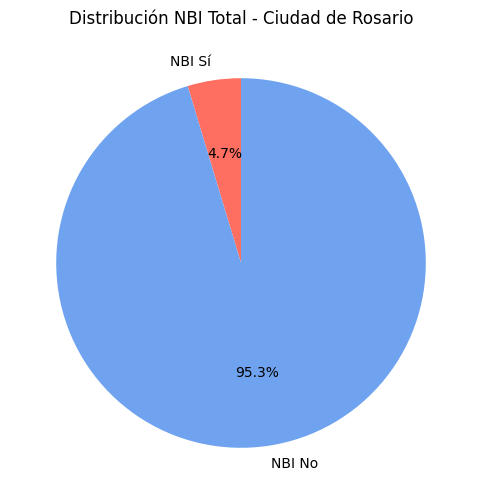

In [125]:
# Gráfico de torta hogares con y sin NBI en la ciudad de Rosario
nbi_si_total = datos_censales_con_gdf['NBI_Si'].sum()
nbi_no_total = datos_censales_con_gdf['NBI_No'].sum()

valores = [nbi_si_total, nbi_no_total]
etiquetas = ['NBI Sí', 'NBI No']
colores = ['#FF6F61', '#6FA3EF']

plt.figure(figsize=(6,6))
plt.pie(valores, labels=etiquetas,autopct='%1.1f%%', colors=colores, startangle=90)
plt.title('Distribución NBI Total - Ciudad de Rosario')
plt.show()

Nueva columna __'tasa_NBI_%'__

Es el % de hogares con NBI_Si respecto al total de cada radio censal.

In [126]:
# Creamos una columna con la tasa de NBI por radio censal
datos_censales_con_gdf['tasa_NBI_%'] = (datos_censales_con_gdf['NBI_Si'] / datos_censales_con_gdf['Total Hogares']) * 100

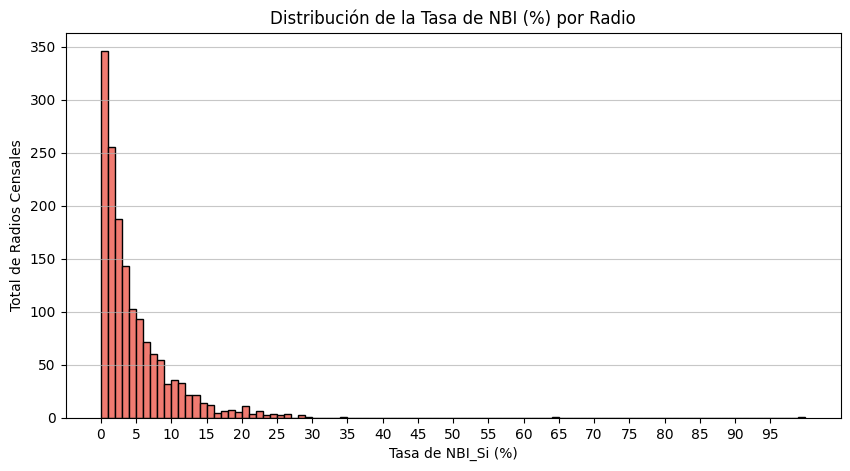

In [127]:
# Histograma de la tasa de NBI por radio.

plt.figure(figsize=(10,5))

plt.hist(datos_censales_con_gdf['tasa_NBI_%'], bins=100, color="#F07B71", edgecolor='black')

#Mostramos las etiquetas del eje x de 5 en 5
plt.xticks(np.arange(0, 100, 5))

plt.title('Distribución de la Tasa de NBI (%) por Radio')
plt.xlabel('Tasa de NBI_Si (%)')
plt.ylabel('Total de Radios Censales')
plt.grid(axis='y', alpha=0.7)
plt.show()

In [128]:
# Vemos cuantos radios censales tiene una tasa de NBI mayor al 20%
radios_mayor_20 = datos_censales_con_gdf[datos_censales_con_gdf['tasa_NBI_%'] > 20]
cantidad_radios_mayor_20 = radios_mayor_20.shape[0]
print(f"Cantidad de radios censales con tasa de NBI mayor al 20%: {cantidad_radios_mayor_20}")

Cantidad de radios censales con tasa de NBI mayor al 20%: 33


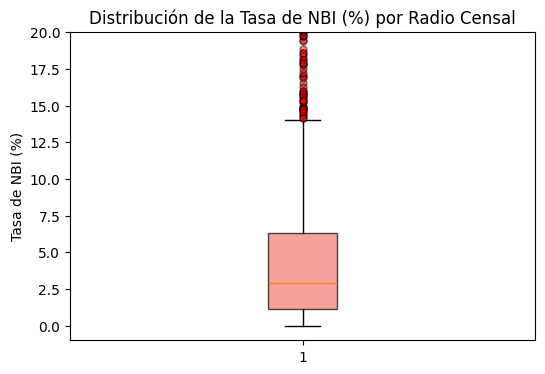

In [129]:
# Vemos en un boxplot la distribucion de la tasa de NBI por radio censal
plt.figure(figsize=(6, 4))
plt.boxplot(datos_censales_con_gdf['tasa_NBI_%'], vert=True, patch_artist=True,
            #Color boxplot
            boxprops=dict(facecolor='#F07B71', alpha=0.7),
            #Color de los outliers
            flierprops=dict(marker='o', markersize=5, markerfacecolor='red', alpha=0.5))

plt.title('Distribución de la Tasa de NBI (%) por Radio Censal')
plt.ylabel('Tasa de NBI (%)')
plt.ylim(-1, 20)  # Limitamos el eje y hasta 20
plt.show()


##### 1.1.2 Ranking de radios con mayor NBI

In [57]:
# Tomamos los radios censales con tasa de NBI mayor al 20%
radios_con_tasa_mayor_20 = datos_censales_con_gdf[datos_censales_con_gdf['tasa_NBI_%'] > 20]

# Mostramos los radios con tasa NBI_Si mayor al 20% ordenados de mayor a menor
radios_con_tasa_mayor_20 = radios_con_tasa_mayor_20.sort_values(by='tasa_NBI_%', ascending=False)
print(radios_con_tasa_mayor_20[['CodigoRadioCensal', 'tasa_NBI_%', 'NBI_Si', 'NBI_No', 'Total Hogares']])


     CodigoRadioCensal  tasa_NBI_%  NBI_Si  NBI_No  Total Hogares
1319         820845602  100.000000       1       0              1
1272         820845406   64.285714       9       5             14
1316         820845529   34.177215      81     156            237
1222         820845207   29.368030      79     190            269
1166         820844824   28.709677      89     221            310
1312         820845525   28.354978     131     331            462
99           820844915   26.388889      57     159            216
1460         820848418   26.335878      69     193            262
1149         820844807   26.328502     109     305            414
1458         820848416   25.941423      62     177            239
848          820843516   25.229358      55     163            218
856          820843524   24.657534      72     220            292
1219         820845204   24.252492      73     228            301
362          820841317   24.161074      36     113            149
1113      

Hay un radio que tiene solamente 1 hogar y ese hogar tiene NBI. 

     CodigoRadioCensal  tasa_NBI_%  NBI_Si  NBI_No  Total Hogares
1319         820845602       100.0       1       0              1


<Axes: >

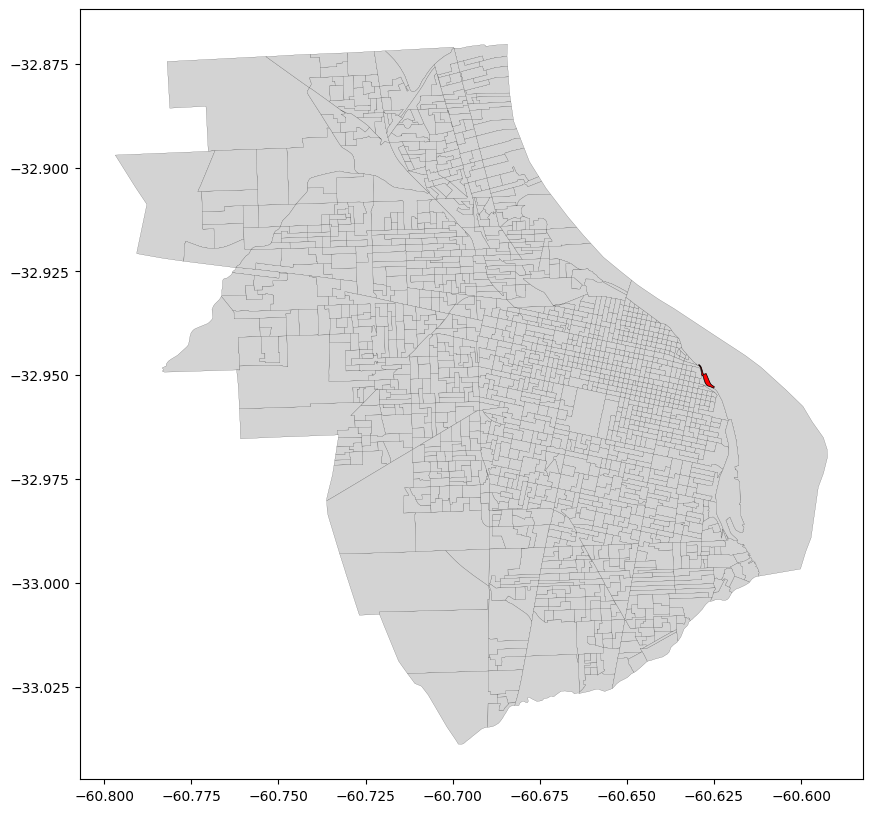

In [130]:
# Vemos cual es el radio censal 820845602
radio_820845602 = datos_censales_con_gdf[datos_censales_con_gdf['CodigoRadioCensal'] == '820845602']

print(radio_820845602[['CodigoRadioCensal', 'tasa_NBI_%', 'NBI_Si', 'NBI_No', 'Total Hogares']])

#Graficamos es radio censal para ver cual es
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Mapa base: todos los radios en gris claro
datos_censales_con_gdf.plot(
    color='lightgrey', 
    edgecolor='black', 
    linewidth=0.1,
    ax=ax)

#Superponemos ese radio censal
radio_820845602.plot(
    color= 'red',
    legend=True, 
    edgecolor='black', 
    linewidth=0.5, 
    ax=ax
    )

Radio censal atípico (CodigoRadioCensal = 820845602), hay solamente un hogar con una tasa de NBI_Si del 100%

Para no perder el numero de hogares y total de población, agregamos ese hogar al radio censale proximo a el

     CodigoRadioCensal  tasa_NBI_%  NBI_Si  NBI_No  Total Hogares
1318         820845601         0.0       0      20             20


<Axes: >

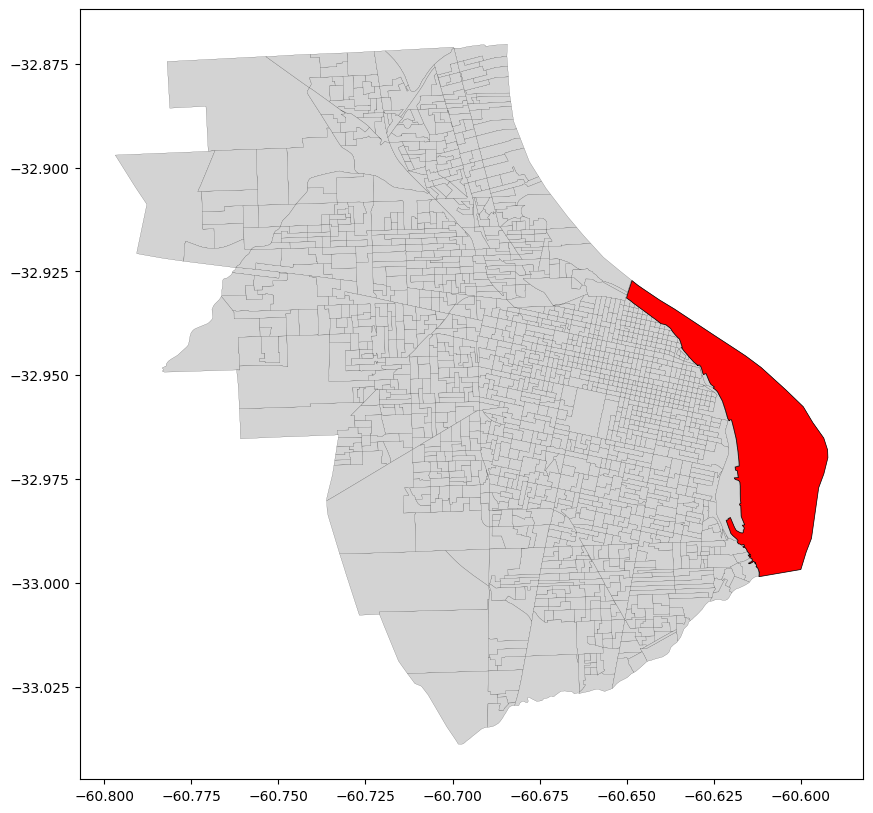

In [132]:
# Vemos cual es el radio censal 820845601, vecino al 820845602
radio_820845601 = datos_censales_con_gdf[datos_censales_con_gdf['CodigoRadioCensal'] == '820845601']

print(radio_820845601[['CodigoRadioCensal', 'tasa_NBI_%', 'NBI_Si', 'NBI_No', 'Total Hogares']])

#Graficamos es radio censal para ver cual es
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Mapa base: todos los radios en gris claro
datos_censales_con_gdf.plot(
    color='lightgrey', 
    edgecolor='black', 
    linewidth=0.1,
    ax=ax)

#Superponemos ese radio censal
radio_820845601.plot(
    color= 'red',
    legend=True, 
    edgecolor='black', 
    linewidth=0.5, 
    ax=ax
    )

Combinamos los radios censales 820845602 y 820845601 para no tener el outlier del 820845602 ni tampoco perder el total de hogares

In [136]:
# Le agregamos la fila del 820845602 al radio censal 820845601

r_grande = "820845601"
r_chico  = "820845602"

idx_grande = datos_censales_con_gdf[datos_censales_con_gdf["CodigoRadioCensal"] == r_grande].index[0]
idx_chico  = datos_censales_con_gdf[datos_censales_con_gdf["CodigoRadioCensal"] == r_chico].index[0]

# Sumamos todas las columnas de conteo
cols_sumar = [
    "NBI_Hacinamiento_Si", "NBI_Hacinamiento_No",
    "NBI_Vivienda_Si", "NBI_Vivienda_No",
    "NBI_Sanitarias_Si", "NBI_Sanitarias_No",
    "NBI_Escolaridad_Si", "NBI_Escolaridad_No",
    "NBI_Subsistencia_Si", "NBI_Subsistencia_No",
    "NBI_Si", "NBI_No",
    "Sin_IPMH",
    "IPMH_Solo_Recursos_Corrientes",
    "IPMH_Solo_Recursos_Patrimoniales",
    "IPMH_Convergente",
    "Total Hogares",
    "Total_Poblacion"
]

for col in cols_sumar:
    datos_censales_con_gdf.loc[idx_grande, col] += datos_censales_con_gdf.loc[idx_chico, col]

# Recalculamos la tasa de NBI
datos_censales_con_gdf.loc[idx_grande, "tasa_NBI_%"] = (
    datos_censales_con_gdf.loc[idx_grande, "NBI_Si"]
    / datos_censales_con_gdf.loc[idx_grande, "Total Hogares"]
) * 100

# Unimos geometrías

from shapely.ops import unary_union

datos_censales_con_gdf.loc[idx_grande, "geometry"] = unary_union([
    datos_censales_con_gdf.loc[idx_grande, "geometry"],
    datos_censales_con_gdf.loc[idx_chico, "geometry"]
])

# Eliminamos el radio chico (outlier)
datos_censales_con_gdf = datos_censales_con_gdf.drop(idx_chico).reset_index(drop=True)

In [ ]:
# Guardamos los datos censales con gdf para no tener que ejecutar todo de nuevo cada vez
# datos_censales_con_gdf.to_file("../data/processed/datos_censales_con_gdf.gpkg", driver='GPKG')

--------------

In [149]:
#Mostramos la cantidad de radios con tasa NBI mayor al 20%
radios_con_tasa_mayor_20.shape[0]

33

-- Por tasa NBI_Si mayor al 20%

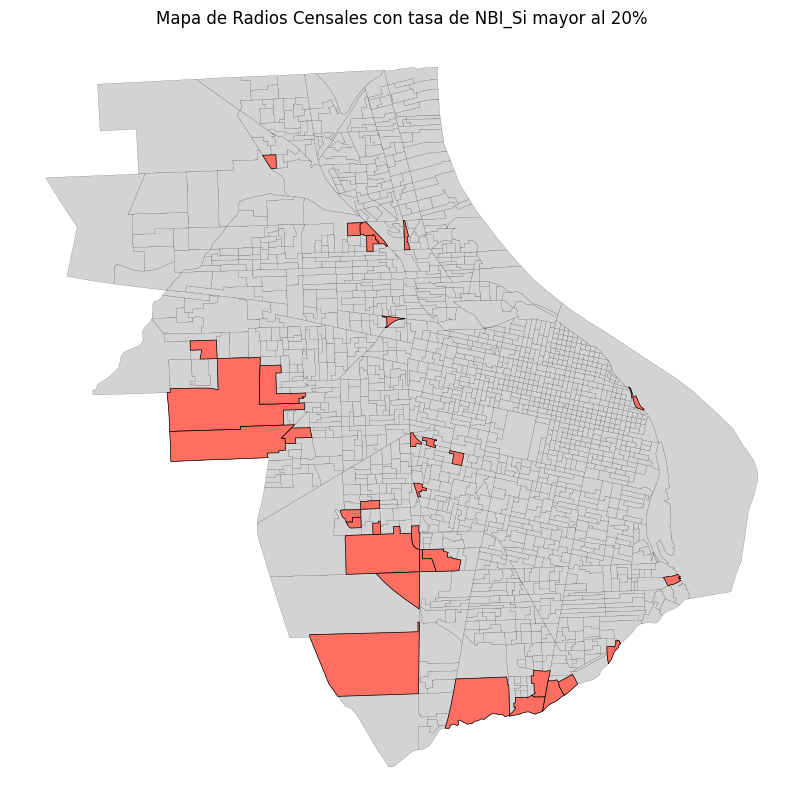

In [150]:
# Graficamos los radios censales con tasa de NBI_Si mayor al 20% (en realidad son los 40 con mayor tasa, los ultimos 4 no llegan a 20%)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Mapa base: todos los radios en gris claro
datos_censales_con_gdf.plot(
    color='lightgrey', 
    edgecolor='black', 
    linewidth=0.1,
    ax=ax)

# Superponer radios con NBI_Si > 20% en rojo
radios_con_tasa_mayor_20.plot(
    #column='NBI_Si', 
    color= '#FF6F61',
    legend=True, 
    edgecolor='black', 
    linewidth=0.5, 
    ax=ax
    )

ax.set_title("Mapa de Radios Censales con tasa de NBI_Si mayor al 20%")
ax.axis('off')
plt.show()

In [151]:
# Tomamos los radios censales ordenados en base a NBI total
radios_ordenados_nbi_top_20 = datos_censales_con_gdf.sort_values(by='NBI_Si', ascending=False).head(20)

# Mostramos los primeros 10 radios censales con mayor NBI
print(radios_ordenados_nbi_top_20[['CodigoRadioCensal', 'NBI_Si', 'Total Hogares', 'tasa_NBI_%']])

     CodigoRadioCensal  NBI_Si  Total Hogares  tasa_NBI_%
1312         820845525     131            462   28.354978
1149         820844807     109            414   26.328502
1016         820844910      89            400   22.250000
1166         820844824      89            310   28.709677
237          820840811      88            467   18.843683
277          820841020      85            423   20.094563
1237         820845222      82            407   20.147420
1131         820844719      81            410   19.756098
1316         820845529      81            237   34.177215
1222         820845207      79            269   29.368030
821          820843416      74            370   20.000000
1128         820844716      74            381   19.422572
1219         820845204      73            301   24.252492
856          820843524      72            292   24.657534
1459         820848418      69            262   26.335878
967          820844005      68            418   16.267943
1167         8

-- Por cantidad de Hogares con NBI_Si

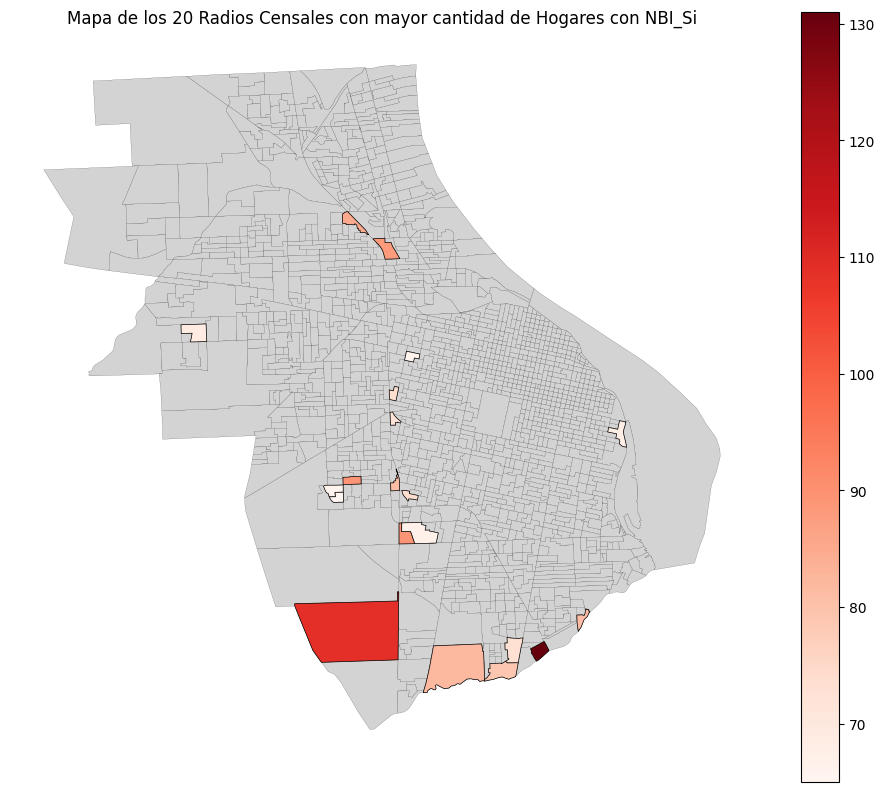

In [152]:
# Graficamos los radios censales con total de Hogares con NBI_Si
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Mapa base: todos los radios en gris claro
datos_censales_con_gdf.plot(
    color='lightgrey', 
    edgecolor='black', 
    linewidth=0.1, 
    ax=ax)

# Superponer top 40 radios con NBI_Si > 20% en rojo
radios_ordenados_nbi_top_20.plot(
    column='NBI_Si', 
    cmap='Reds',
    legend=True, 
    edgecolor='black', 
    linewidth=0.5, 
    ax=ax,

    #Modificamos el rango que toma la escala 
    vmin=radios_ordenados_nbi_top_20['NBI_Si'].min(),
    vmax=radios_ordenados_nbi_top_20['NBI_Si'].max()

    )

ax.set_title("Mapa de los 20 Radios Censales con mayor cantidad de Hogares con NBI_Si")
ax.axis('off')
plt.show()

Podemos CATEGORIZAR los radios censales segun el porcentaje de hogares con NBI.

Categorizamos la variable 'tasa_NBI_%'

In [153]:
datos_censales_con_gdf['tasa_NBI_%'].describe()

count    1536.000000
mean        4.597867
std         5.134929
min         0.000000
25%         1.160555
50%         2.892032
75%         6.300986
max        64.285714
Name: tasa_NBI_%, dtype: float64

In [154]:
# Vamos a categorizar los datos para mejorar la visualización en el mapa 
# Definimos 3 categorias, NBI bajo, NBI medio y NBI alto

def categorizar_nbi_tasa(valor):
    if valor <=  2.890173: #Mediana de la tasa de NBI
        return 'Bajo NBI' #Por debajo de la mediana (2.890173)
    elif valor <= 6.306306: #Tercer cuartil de la tasa de NBI
        return 'Medio NBI' #Entre la mediana(2.890173) y el tercer cuartil(6.306306)
    else:
        return 'Alto NBI' #Por encima del tercer cuartil (6.306306)

In [155]:
# Aplicar la categorización
datos_censales_con_gdf['NBI_Si_tasa_categorizado'] = datos_censales_con_gdf['tasa_NBI_%'].apply(categorizar_nbi_tasa)

datos_censales_con_gdf[['NBI_Si_tasa_categorizado', 'tasa_NBI_%']].head(10)

NBI_Si_tasa_categorizado  tasa_NBI_%
0                 Alto NBI   19.475655
1                 Bajo NBI    1.754386
2                 Alto NBI    6.666667
3                Medio NBI    5.239180
4                Medio NBI    5.349794
5                Medio NBI    5.128205
6                 Bajo NBI    0.497512
7                 Alto NBI   10.434783
8                 Bajo NBI    1.449275
9                 Alto NBI   11.206897

/tmp/ipykernel_18828/3270611807.py:30: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(title='Cantidad de Hogares con NBI', loc='upper left', bbox_to_anchor=(1, 1))


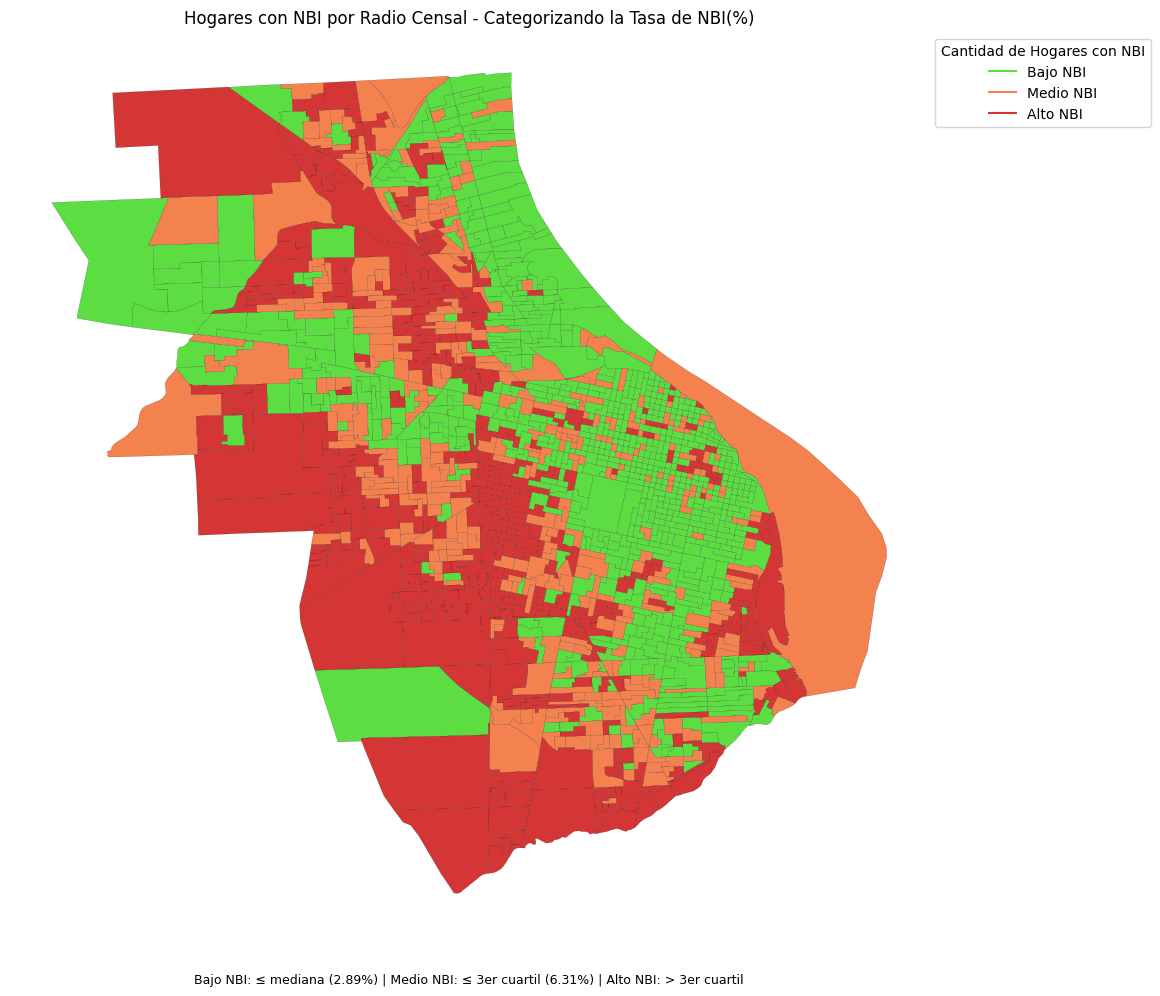

In [156]:
# Creamos un mapa por radios de la ciudad de Rosario por cantidad de hogares con NBI_Si categorizado
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Definimos los colores para cada categoría
colores_categoria = {
    'Bajo NBI': "#5cdd42", 
    'Medio NBI': "#F3824E",
    'Alto NBI': "#D12525ED"
}

# Plotear cada categoría
for categoria, color in colores_categoria.items():
    subset = datos_censales_con_gdf[datos_censales_con_gdf['NBI_Si_tasa_categorizado'] == categoria]
    if len(subset) > 0:
        subset.plot(
            color=color, 
            edgecolor='black', 
            linewidth=0.1, 
            ax=ax, 
            label=categoria
            )

# Agregamos referencias de cada categoría
# (ya que no se puede agregar una leyenda automáticamente con este método)
for categoria, color in colores_categoria.items():
    ax.plot([], [], color=color, label=categoria) 

ax.set_title("Hogares con NBI por Radio Censal - Categorizando la Tasa de NBI(%)")
ax.axis('off')
ax.legend(title='Cantidad de Hogares con NBI', loc='upper left', bbox_to_anchor=(1, 1))
ax.text(
    0.5, -0.05,
    "Bajo NBI: ≤ mediana (2.89%) | Medio NBI: ≤ 3er cuartil (6.31%) | Alto NBI: > 3er cuartil",
    ha='center', va='center', fontsize=9, transform=ax.transAxes
)
plt.tight_layout()
plt.show()

In [157]:
# Vemos cuantos radios censales hay en cada categoría
datos_censales_con_gdf['NBI_Si_tasa_categorizado'].value_counts()

NBI_Si_tasa_categorizado
Bajo NBI     767
Medio NBI    385
Alto NBI     384
Name: count, dtype: int64

##### 1.2. Desagregando por tipo de NBI


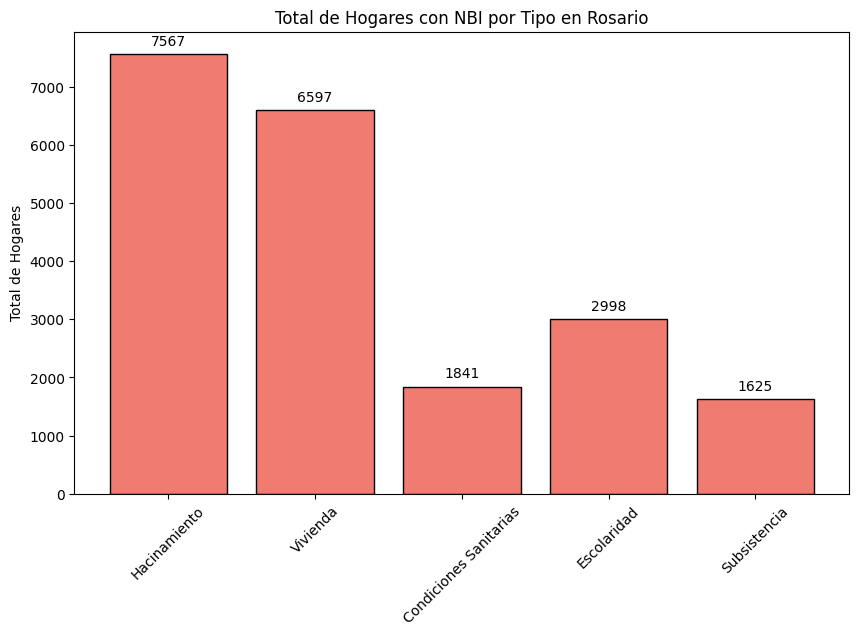

In [158]:
# Vemos cual indicador de NBI es el que más afecta a la ciudad de Rosario
# Sumamos cada tipo de NBI en toda la ciudad
totales_tipos = {
    'Hacinamiento': datos_censales_con_gdf['NBI_Hacinamiento_Si'].sum(),
    'Vivienda': datos_censales_con_gdf['NBI_Vivienda_Si'].sum(),
    'Condiciones Sanitarias': datos_censales_con_gdf['NBI_Sanitarias_Si'].sum(),
    'Escolaridad': datos_censales_con_gdf['NBI_Escolaridad_Si'].sum(),
    'Subsistencia': datos_censales_con_gdf['NBI_Subsistencia_Si'].sum(),
}

plt.figure(figsize=(10,6))
plt.bar(totales_tipos.keys(), totales_tipos.values(), color='#F07B71', edgecolor='black')
plt.title('Total de Hogares con NBI por Tipo en Rosario')
plt.ylabel('Total de Hogares')
plt.xticks(rotation=45)

# Agregamos los valores encima de cada barra
for i, valor in enumerate(totales_tipos.values()):
    plt.text(i, valor + 100, str(valor), ha='center', va='bottom')

plt.show()


Los valores reflejan la cantidad de hogares con al menos una privación en cada dimensión del NBI.
>Las dimensiones más prevalentes en Rosario son el **hacinamiento** y las **condiciones de la vivienda**, 
>lo que sugiere que las carencias habitacionales son el principal componente del indicador.

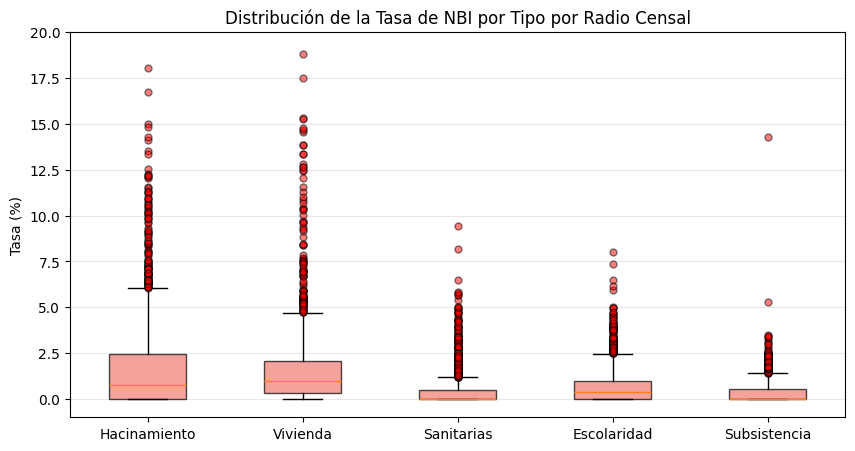

In [159]:
# Graficamos un boxplot por cada uno de los tipos de NBI por radio censal

# Creamos columnas con la tasa de cada tipo de NBI por radio censal
datos_censales_con_gdf['tasa_NBI_hacinamiento_%'] = (datos_censales_con_gdf['NBI_Hacinamiento_Si'] / datos_censales_con_gdf['Total Hogares']) * 100
datos_censales_con_gdf['tasa_NBI_vivienda_%'] = (datos_censales_con_gdf['NBI_Vivienda_Si'] / datos_censales_con_gdf['Total Hogares']) * 100
datos_censales_con_gdf['tasa_NBI_sanitarias_%'] = (datos_censales_con_gdf['NBI_Sanitarias_Si'] / datos_censales_con_gdf['Total Hogares']) * 100
datos_censales_con_gdf['tasa_NBI_escolaridad_%'] = (datos_censales_con_gdf['NBI_Escolaridad_Si'] / datos_censales_con_gdf['Total Hogares']) * 100
datos_censales_con_gdf['tasa_NBI_subsistencia_%'] = (datos_censales_con_gdf['NBI_Subsistencia_Si'] / datos_censales_con_gdf['Total Hogares']) * 100

plt.figure(figsize=(10, 5))

plt.boxplot([
    datos_censales_con_gdf['tasa_NBI_hacinamiento_%'],
    datos_censales_con_gdf['tasa_NBI_vivienda_%'],
    datos_censales_con_gdf['tasa_NBI_sanitarias_%'],
    datos_censales_con_gdf['tasa_NBI_escolaridad_%'],
    datos_censales_con_gdf['tasa_NBI_subsistencia_%']
], vert=True, patch_artist=True,
    #Color boxplot
    boxprops=dict(facecolor='#F07B71', alpha=0.7),
    #Color de los outliers
    flierprops=dict(marker='o', markersize=5, markerfacecolor='red', alpha=0.5)
)

plt.title('Distribución de la Tasa de NBI por Tipo por Radio Censal')
plt.ylabel('Tasa (%)')
plt.ylim(-1, 20)
plt.xticks([1, 2, 3, 4, 5], ['Hacinamiento', 'Vivienda', 'Sanitarias', 'Escolaridad', 'Subsistencia'])
plt.grid(axis='y', alpha=0.3)

plt.show()

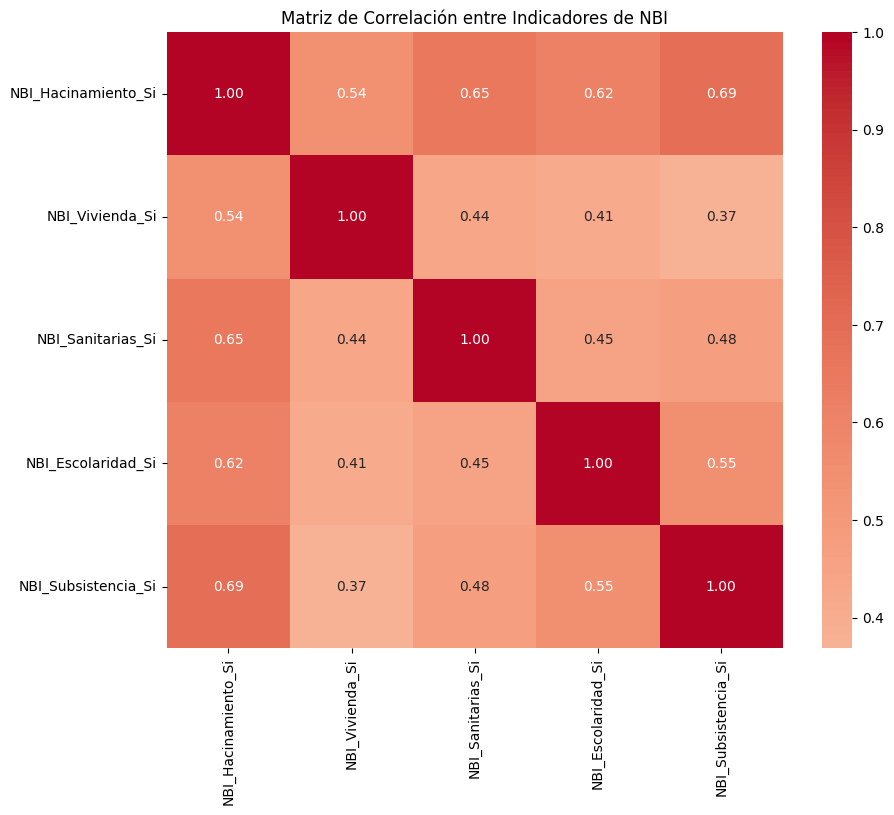

                     NBI_Hacinamiento_Si  NBI_Vivienda_Si  NBI_Sanitarias_Si  \
NBI_Hacinamiento_Si             1.000000         0.542875           0.651920   
NBI_Vivienda_Si                 0.542875         1.000000           0.435825   
NBI_Sanitarias_Si               0.651920         0.435825           1.000000   
NBI_Escolaridad_Si              0.616674         0.412017           0.447867   
NBI_Subsistencia_Si             0.686966         0.368726           0.475741   

                     NBI_Escolaridad_Si  NBI_Subsistencia_Si  
NBI_Hacinamiento_Si            0.616674             0.686966  
NBI_Vivienda_Si                0.412017             0.368726  
NBI_Sanitarias_Si              0.447867             0.475741  
NBI_Escolaridad_Si             1.000000             0.553909  
NBI_Subsistencia_Si            0.553909             1.000000  


In [160]:
# Matriz de correlación entre todos los indicadores NBI
nbi_columns = ['NBI_Hacinamiento_Si', 'NBI_Vivienda_Si', 'NBI_Sanitarias_Si', 
               'NBI_Escolaridad_Si', 'NBI_Subsistencia_Si']

correlation_matrix = datos_censales_con_gdf[nbi_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Matriz de Correlación entre Indicadores de NBI')
plt.show()

print(correlation_matrix)

Las correlaciones mas fuertes parecen ser __Hacinamiento-Subsistencia (0.69)__ y __Hacinamiento-Sanitarias (0.65)__

##### 1.3. Mapa de NBI total

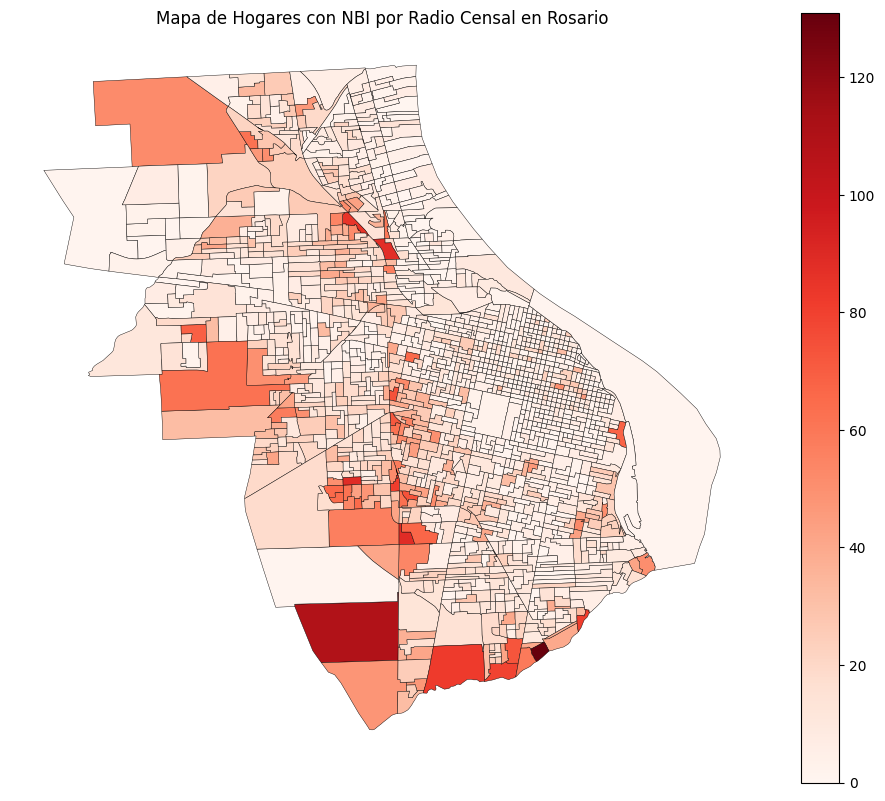

In [161]:
# Graficamos los radios censales según NBI total (NBI_Si)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

datos_censales_con_gdf.plot(
    column='NBI_Si',      
    cmap='Reds',          
    legend=True,          
    edgecolor='black',
    linewidth=0.3,  
    ax=ax
)

ax.set_title("Mapa de Hogares con NBI por Radio Censal en Rosario")
ax.axis('off')  # Sacamos los ejes
plt.show()


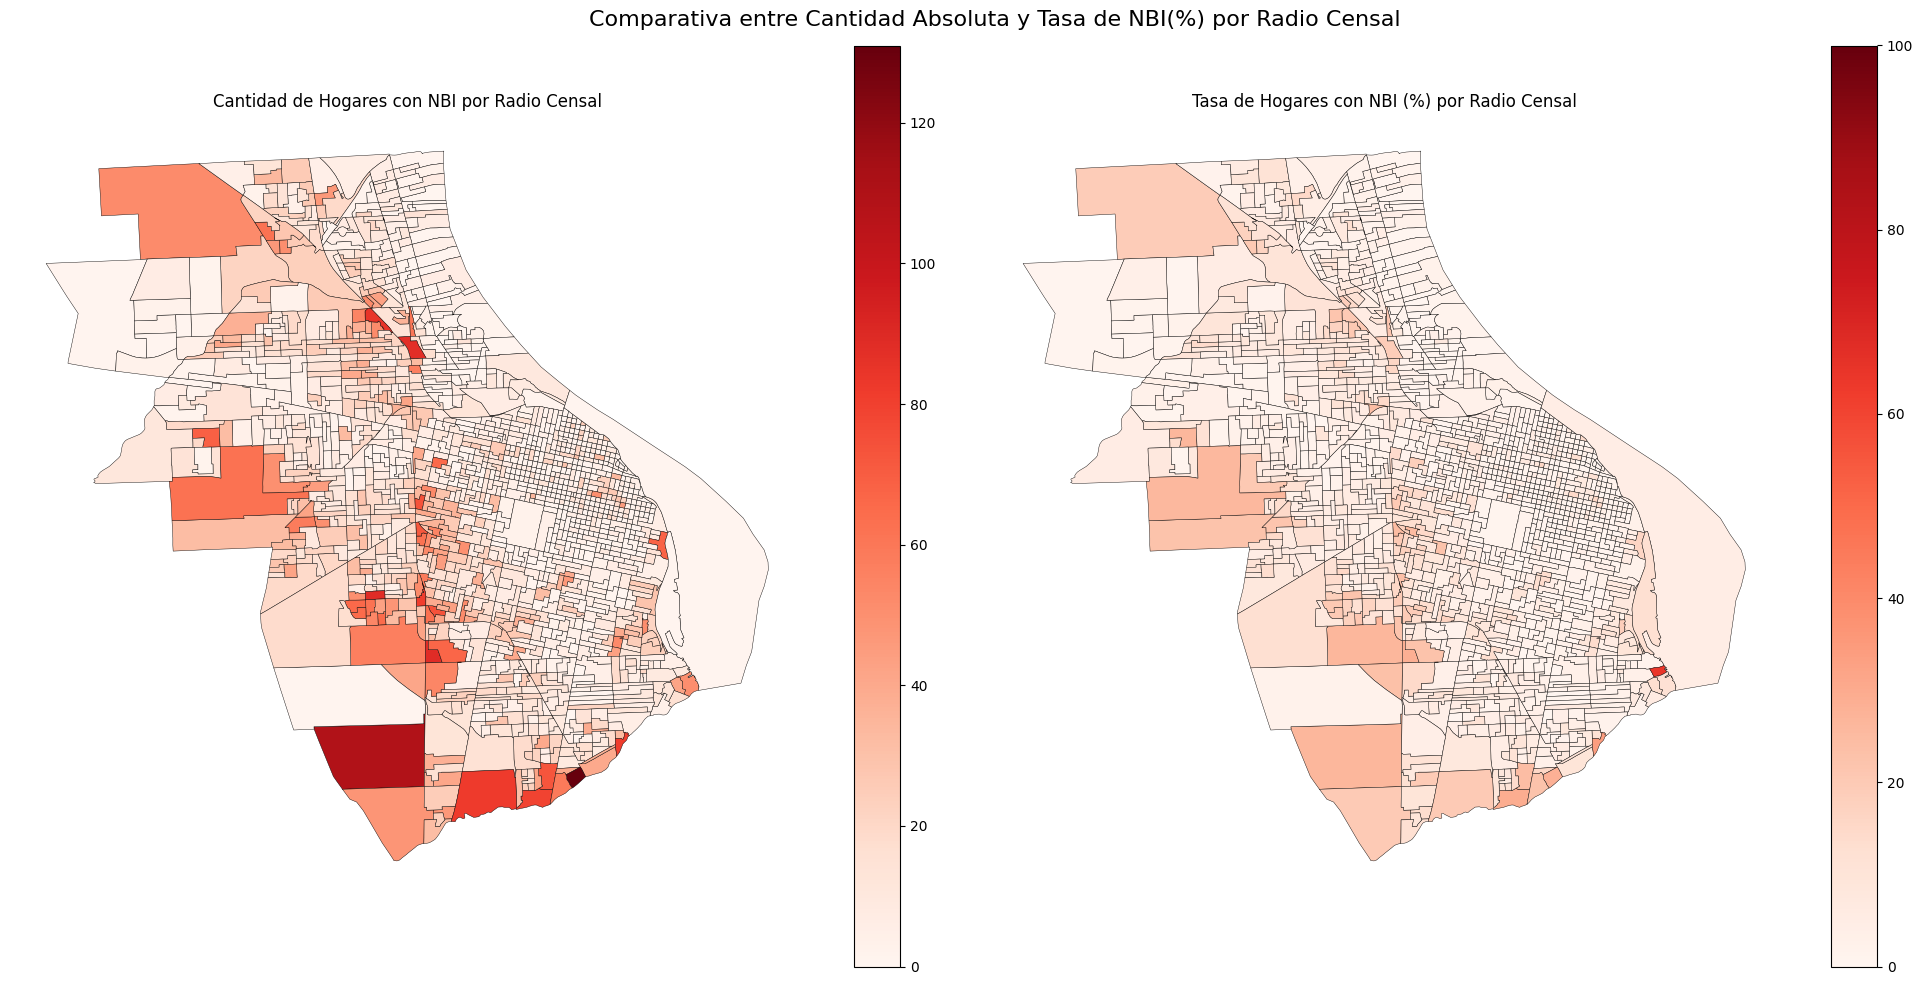

In [162]:
# Graficamos ambos, la cantidad absoluta de hogares con NBI y la tasa de NBI (%)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Mapa 1: Cantidad absoluta de hogares con NBI
datos_censales_con_gdf.plot(
    column='NBI_Si',
    cmap='Reds',
    legend=True,
    edgecolor='black',
    linewidth=0.3,
    ax=axes[0]
)
axes[0].set_title("Cantidad de Hogares con NBI por Radio Censal")
axes[0].axis('off')

# Mapa 2: Tasa de NBI (%)
datos_censales_con_gdf.plot(
    column='tasa_NBI_%',
    cmap='Reds',
    legend=True,
    edgecolor='black',
    linewidth=0.3,
    ax=axes[1],
    vmin=0,
    vmax=100  # fijamos al máximo real aproximado (MODIFICAR )
)
axes[1].set_title("Tasa de Hogares con NBI (%) por Radio Censal")
axes[1].axis('off')

# Titulo sobre ambos graficos
plt.suptitle("Comparativa entre Cantidad Absoluta y Tasa de NBI(%) por Radio Censal", fontsize=16)

plt.tight_layout()
plt.show()

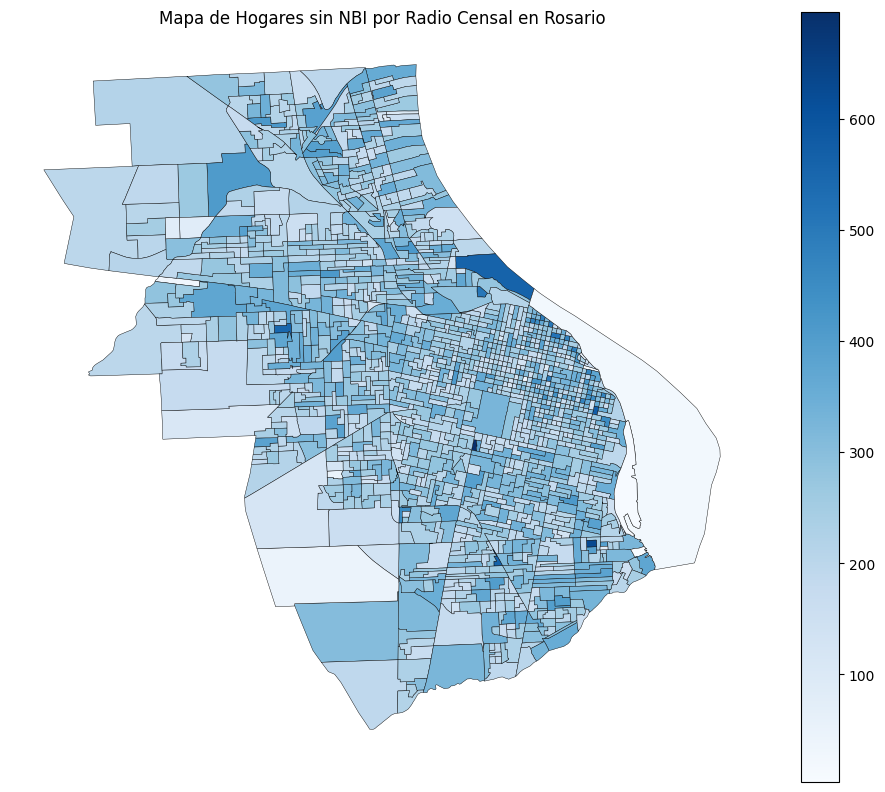

In [163]:
# Graficamos los radios censales según los que no tienen NBI (NBI_No)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

datos_censales_con_gdf.plot(
    column='NBI_No',      
    cmap='Blues',          
    legend=True,          
    edgecolor='black',
    linewidth=0.3,  
    ax=ax
)

ax.set_title("Mapa de Hogares sin NBI por Radio Censal en Rosario")
ax.axis('off')  # Sacamos los ejes
plt.show()

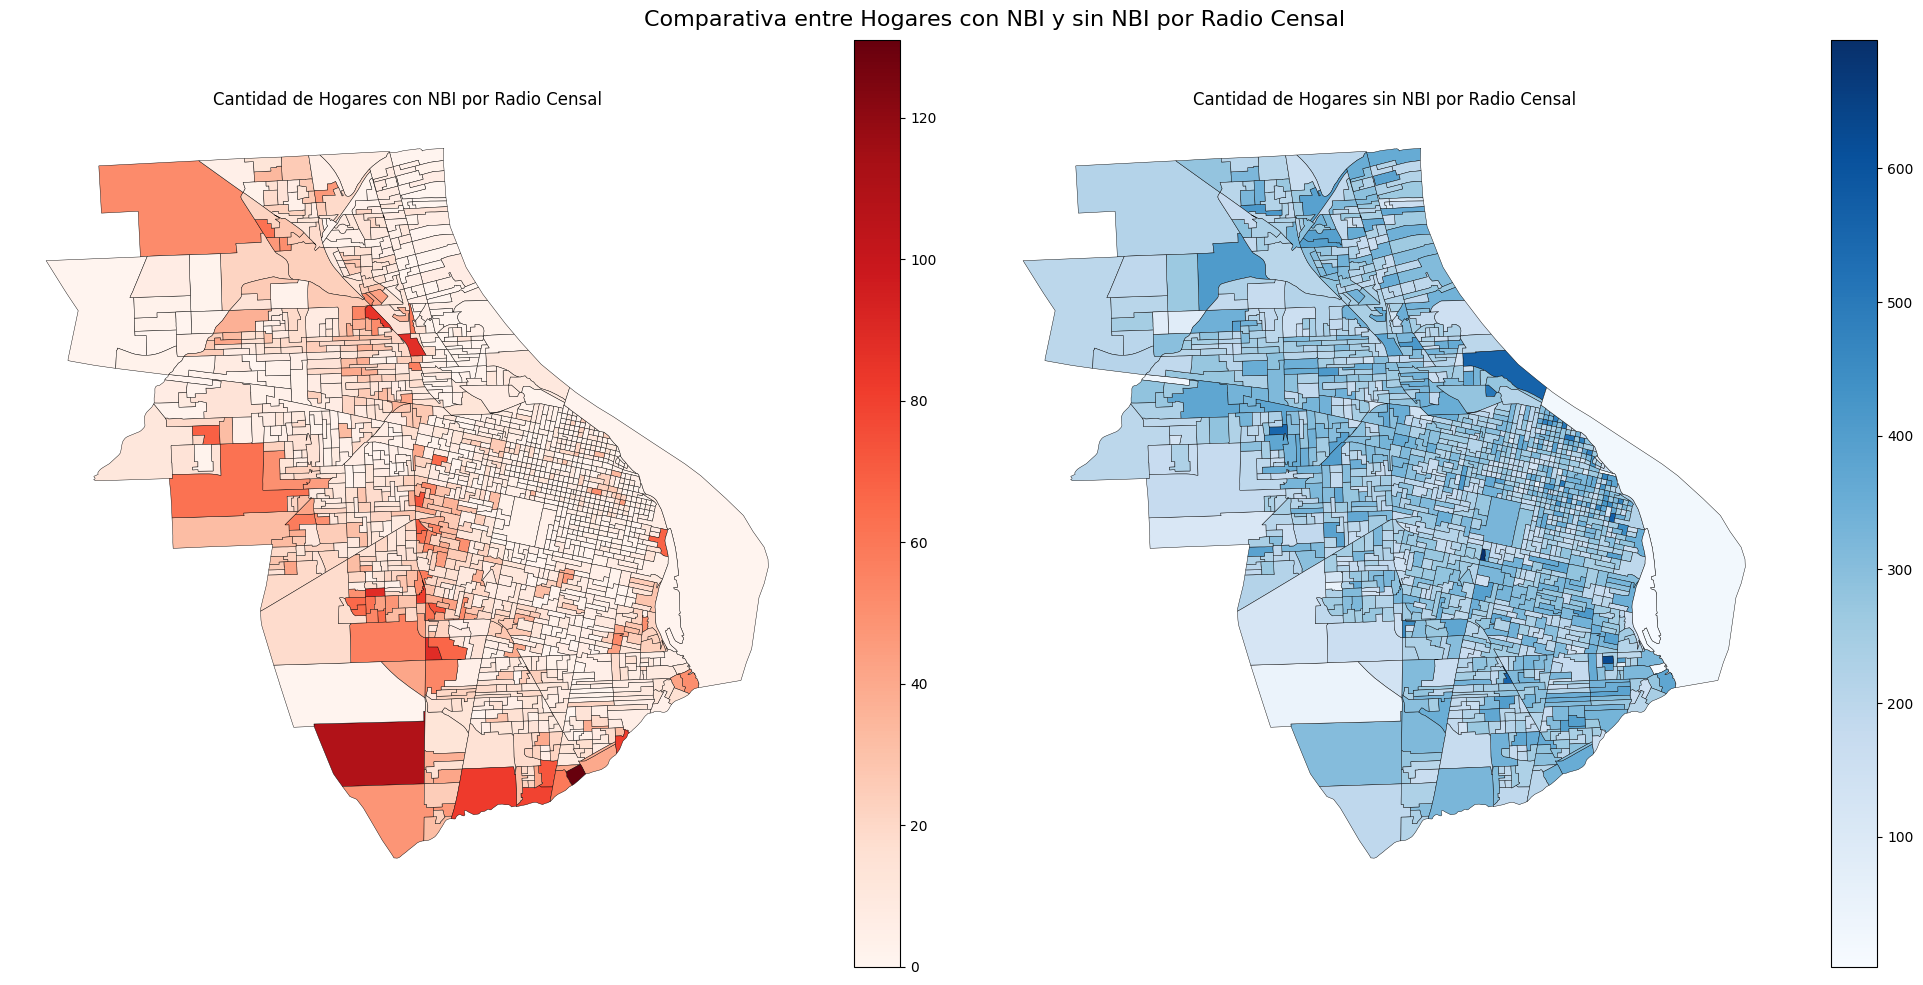

In [164]:
# Graficamos NBI_Si y NBI_No uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Mapa NBI_Si (izquierda)
datos_censales_con_gdf.plot(
    column='NBI_Si', 
    cmap='Reds', 
    legend=True, 
    edgecolor='black', 
    linewidth=0.3, 
    ax=axes[0]
    )
axes[0].set_title("Cantidad de Hogares con NBI por Radio Censal")
axes[0].axis('off')

# Mapa NBI_No (derecha)
datos_censales_con_gdf.plot(
    column='NBI_No', 
    cmap='Blues', 
    legend=True, 
    edgecolor='black',
    linewidth=0.3, 
    ax=axes[1]
    )
axes[1].set_title("Cantidad de Hogares sin NBI por Radio Censal")
axes[1].axis('off')

plt.suptitle("Comparativa entre Hogares con NBI y sin NBI por Radio Censal", fontsize=16)

plt.tight_layout()
plt.show()

<hr style="border: none; border-top: 1px dashed #aaa;" />

### 2. Índice de Privación Material de los Hogares (IPMH)

- 'Sin_IPMH'
- 'IPMH_Solo_Recursos_Corrientes'
- 'IPMH_Solo_Recursos_Patrimoniales'
- 'IPMH_Convergente' 
- 'Total Hogares '

In [166]:
datos_censales_con_gdf['Sin_IPMH'].describe()

count    1536.000000
mean      184.244141
std        78.365574
min         0.000000
25%       135.750000
50%       177.000000
75%       236.250000
max       568.000000
Name: Sin_IPMH, dtype: float64

In [167]:
datos_censales_con_gdf['IPMH_Solo_Recursos_Corrientes'].describe()

count    1536.000000
mean       37.147786
std        18.972592
min         0.000000
25%        23.000000
50%        35.000000
75%        47.000000
max       185.000000
Name: IPMH_Solo_Recursos_Corrientes, dtype: float64

In [168]:
datos_censales_con_gdf['IPMH_Solo_Recursos_Corrientes'].describe()

count    1536.000000
mean       37.147786
std        18.972592
min         0.000000
25%        23.000000
50%        35.000000
75%        47.000000
max       185.000000
Name: IPMH_Solo_Recursos_Corrientes, dtype: float64

In [169]:
datos_censales_con_gdf['IPMH_Convergente'].describe()

count    1536.000000
mean       18.977865
std        31.619596
min         0.000000
25%         1.000000
50%         5.000000
75%        22.000000
max       226.000000
Name: IPMH_Convergente, dtype: float64

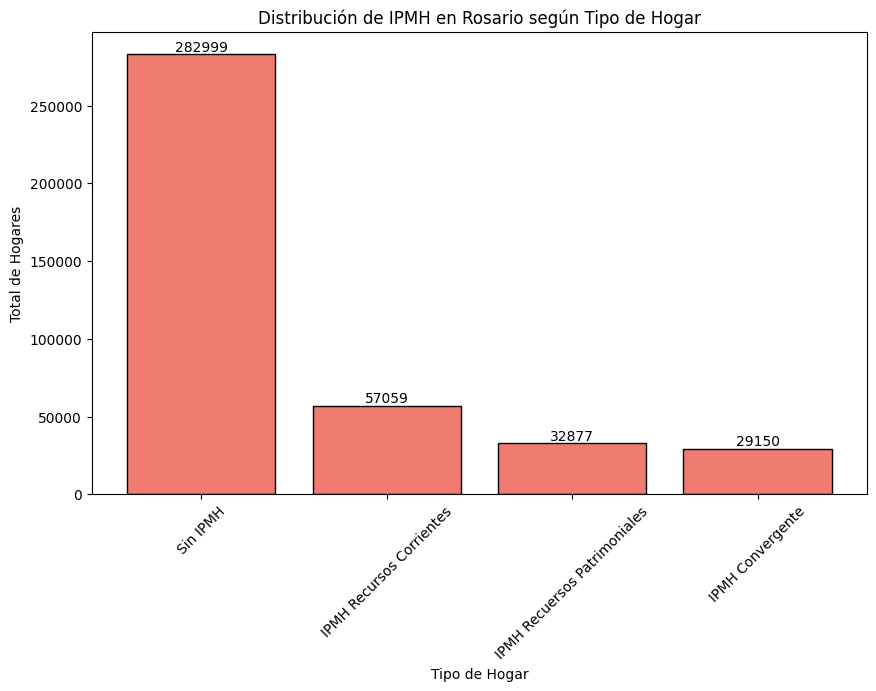

In [170]:
# Vemos como se compone el Indice de Privación Material de los Hogares (IPMH)

totales_tipos = {
    'Sin IPMH': datos_censales_con_gdf['Sin_IPMH'].sum(),
    'IPMH Recursos Corrientes': datos_censales_con_gdf['IPMH_Solo_Recursos_Corrientes'].sum(),
    'IPMH Recuersos Patrimoniales': datos_censales_con_gdf['IPMH_Solo_Recursos_Patrimoniales'].sum(),
    'IPMH Convergente': datos_censales_con_gdf['IPMH_Convergente'].sum()
}

plt.figure(figsize=(10,6))
plt.bar(totales_tipos.keys(), totales_tipos.values(), color='#F07B71', edgecolor='black')
plt.title('Distribución de IPMH en Rosario según Tipo de Hogar')
plt.ylabel('Total de Hogares')
plt.xlabel('Tipo de Hogar')
plt.xticks(rotation=45)

# Agregamos los valores encima de cada barra
for i, valor in enumerate(totales_tipos.values()):
    plt.text(i, valor + 100, str(valor), ha='center', va='bottom')

plt.show()


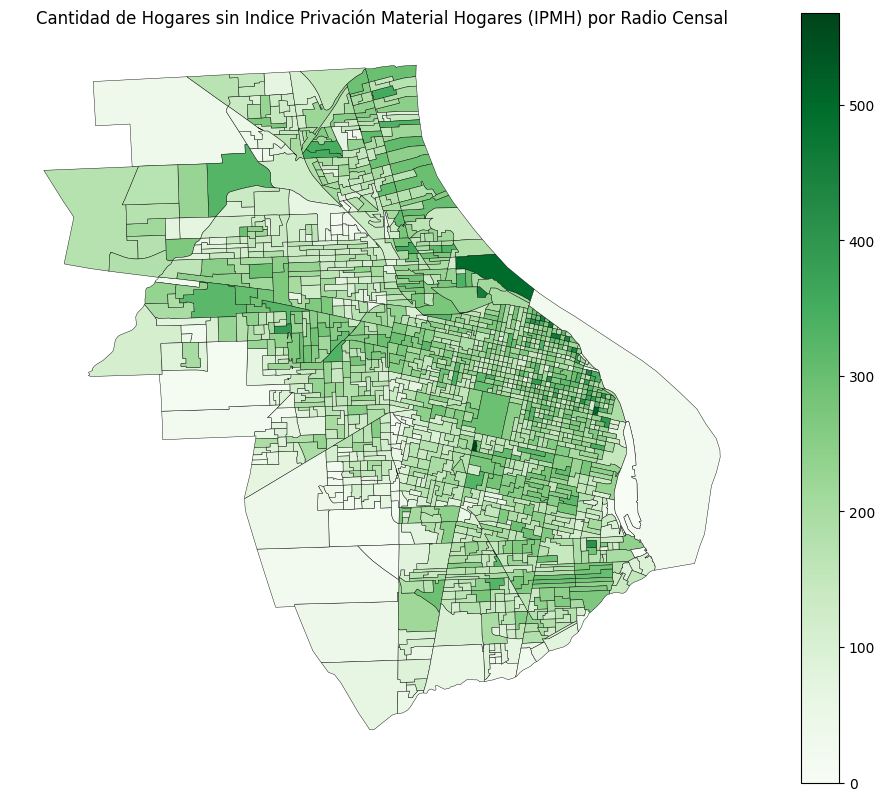

In [171]:
# Graficamos indicador IPMH ('Indice Privación Material de los Hogares) 
# según radios censales de la ciudad de Rosario

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
datos_censales_con_gdf.plot(column='Sin_IPMH', cmap='Greens', legend=True, 
                edgecolor='black', linewidth=0.3, ax=ax)
ax.set_title("Cantidad de Hogares sin Indice Privación Material Hogares (IPMH) por Radio Censal")
ax.axis('off')
plt.show()

Calculamos en porcentajes para que los gráficos sean mas representativos

In [172]:
# Tasa de hogares SIN privación
datos_censales_con_gdf['tasa_Sin_IPMH_%'] = (datos_censales_con_gdf['Sin_IPMH'] / datos_censales_con_gdf['Total Hogares']) * 100

# Tasas de hogares CON privación, según tipología
datos_censales_con_gdf['tasa_Solo_Corriente_%'] = (datos_censales_con_gdf['IPMH_Solo_Recursos_Corrientes'] / datos_censales_con_gdf['Total Hogares']) * 100
datos_censales_con_gdf['tasa_Solo_Patrimonial_%'] = (datos_censales_con_gdf['IPMH_Solo_Recursos_Patrimoniales'] / datos_censales_con_gdf['Total Hogares']) * 100
datos_censales_con_gdf['tasa_Convergente_%'] = (datos_censales_con_gdf['IPMH_Convergente'] / datos_censales_con_gdf['Total Hogares']) * 100

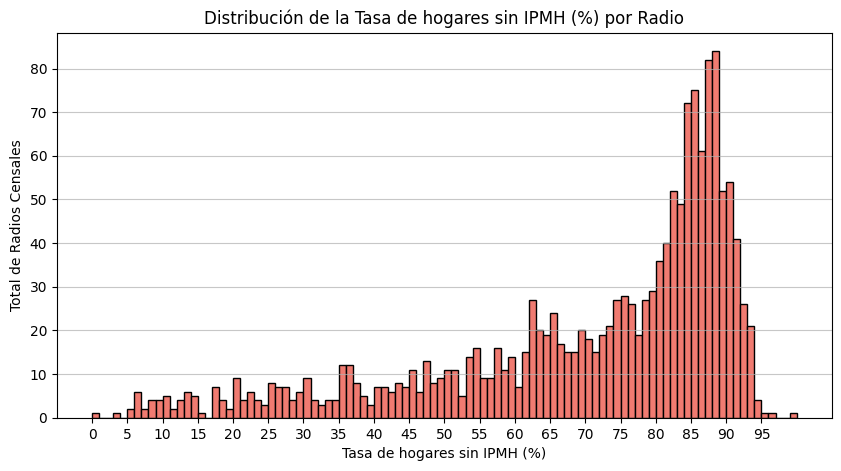

In [173]:
# Histograma de la tasa de hogares sin IPMH por radio.

plt.figure(figsize=(10,5))

plt.hist(datos_censales_con_gdf['tasa_Sin_IPMH_%'], bins=100, color="#F07B71", edgecolor='black')

#Mostramos las etiquetas del eje x de 5 en 5
plt.xticks(np.arange(0, 100, 5))

plt.title('Distribución de la Tasa de hogares sin IPMH (%) por Radio')
plt.xlabel('Tasa de hogares sin IPMH (%)')
plt.ylabel('Total de Radios Censales')
plt.grid(axis='y', alpha=0.7)
plt.show()

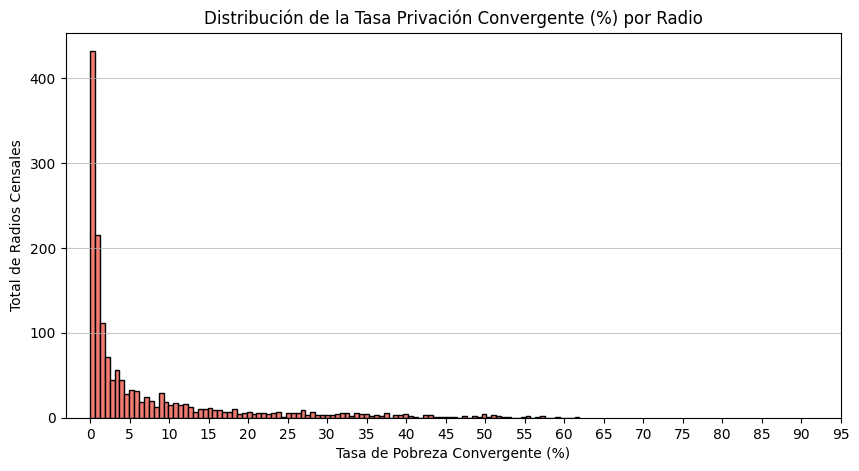

In [174]:
# Histograma de la tasa de privación Convergente (la más grave) por radio censal.

plt.figure(figsize=(10,5))

plt.hist(datos_censales_con_gdf['tasa_Convergente_%'], bins=100, color="#F07B71", edgecolor='black')

#Mostramos las etiquetas del eje x de 5 en 5
plt.xticks(np.arange(0, 100, 5))

plt.title('Distribución de la Tasa Privación Convergente (%) por Radio')
plt.xlabel('Tasa de Pobreza Convergente (%)')
plt.ylabel('Total de Radios Censales')
plt.grid(axis='y', alpha=0.7)
plt.show()

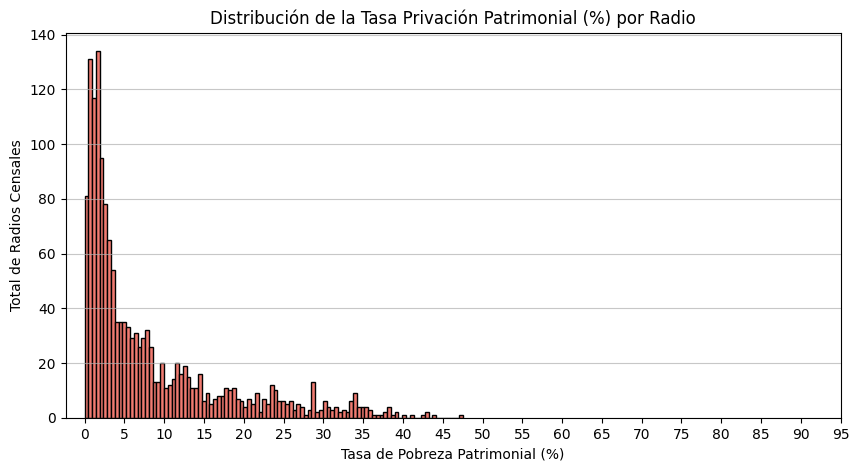

In [175]:
# Histograma de la tasa de privación Patrimonial por radio censal. (Baja incidencia en Rosario)

plt.figure(figsize=(10,5))

plt.hist(datos_censales_con_gdf['tasa_Solo_Patrimonial_%'], bins=100, color="#F07B71", edgecolor='black')

#Mostramos las etiquetas del eje x de 5 en 5
plt.xticks(np.arange(0, 100, 5))

plt.title('Distribución de la Tasa Privación Patrimonial (%) por Radio')
plt.xlabel('Tasa de Pobreza Patrimonial (%)')
plt.ylabel('Total de Radios Censales')
plt.grid(axis='y', alpha=0.7)
plt.show()

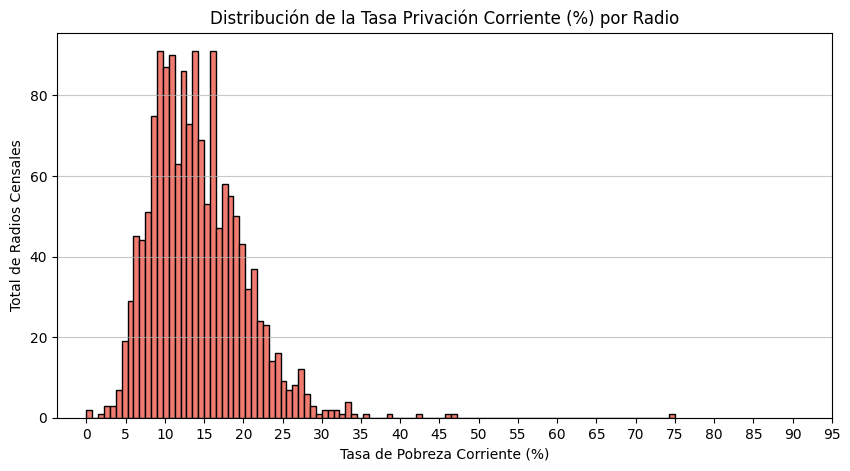

In [176]:
# Histograma de la tasa de privación Corriente por radio censal.

plt.figure(figsize=(10,5))

plt.hist(datos_censales_con_gdf['tasa_Solo_Corriente_%'], bins=100, color="#F07B71", edgecolor='black')

#Mostramos las etiquetas del eje x de 5 en 5
plt.xticks(np.arange(0, 100, 5))

plt.title('Distribución de la Tasa Privación Corriente (%) por Radio')
plt.xlabel('Tasa de Pobreza Corriente (%)')
plt.ylabel('Total de Radios Censales')
plt.grid(axis='y', alpha=0.7)
plt.show()

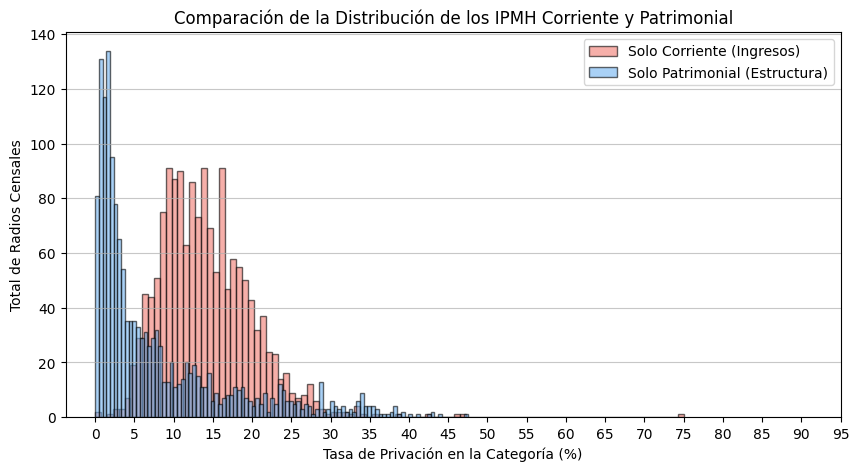

In [177]:
# 1. Tasa Solo Corriente 
plt.figure(figsize=(10,5))

plt.hist(
    datos_censales_con_gdf['tasa_Solo_Corriente_%'],
    bins=100,
    alpha=0.6,               # Transparencia para ver el solapamiento
    label='Solo Corriente (Ingresos)',
    color='#F07B71',         
    edgecolor='black'
)

# 2. Tasa Solo Patrimonial 
plt.hist(
    datos_censales_con_gdf['tasa_Solo_Patrimonial_%'],
    bins=100,
    alpha=0.6,
    label='Solo Patrimonial (Estructura)',
    color='#71B3F0',         
    edgecolor='black'
)

plt.xticks(np.arange(0, 100, 5))
plt.title('Comparación de la Distribución de los IPMH Corriente y Patrimonial')
plt.xlabel('Tasa de Privación en la Categoría (%)')
plt.ylabel('Total de Radios Censales')
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.7)
plt.show()

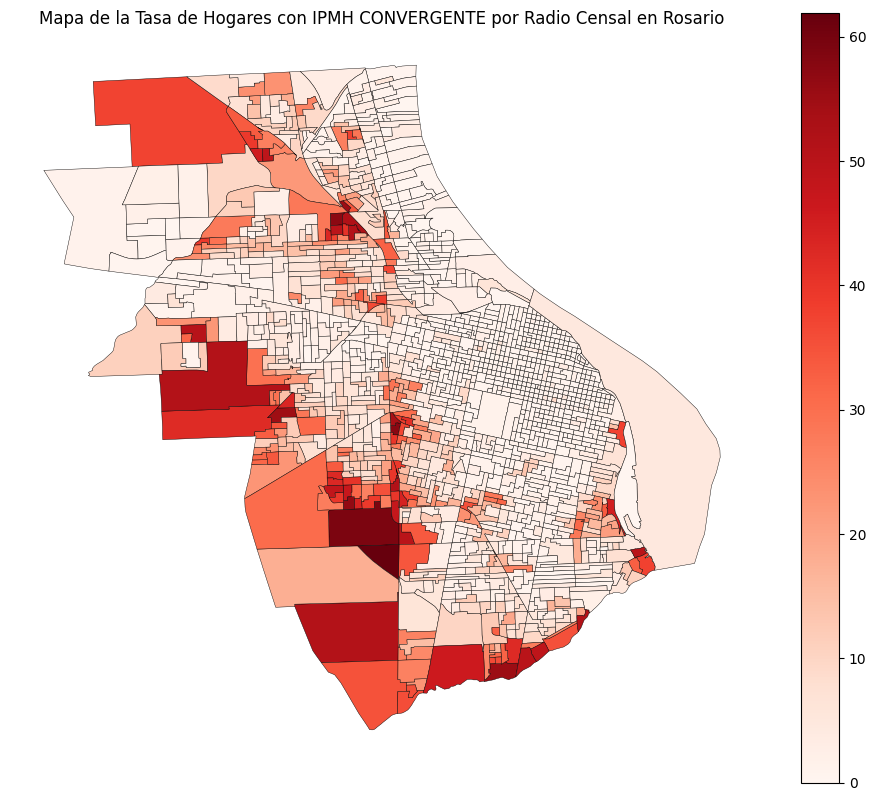

In [178]:
# 'tasa_Convergente_%'

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

datos_censales_con_gdf.plot(
    column='tasa_Convergente_%',          
    cmap='Reds',          
    legend=True,          
    edgecolor='black',
    linewidth=0.3,  
    ax=ax
)

ax.set_title("Mapa de la Tasa de Hogares con IPMH CONVERGENTE por Radio Censal en Rosario")
ax.axis('off')
plt.show()

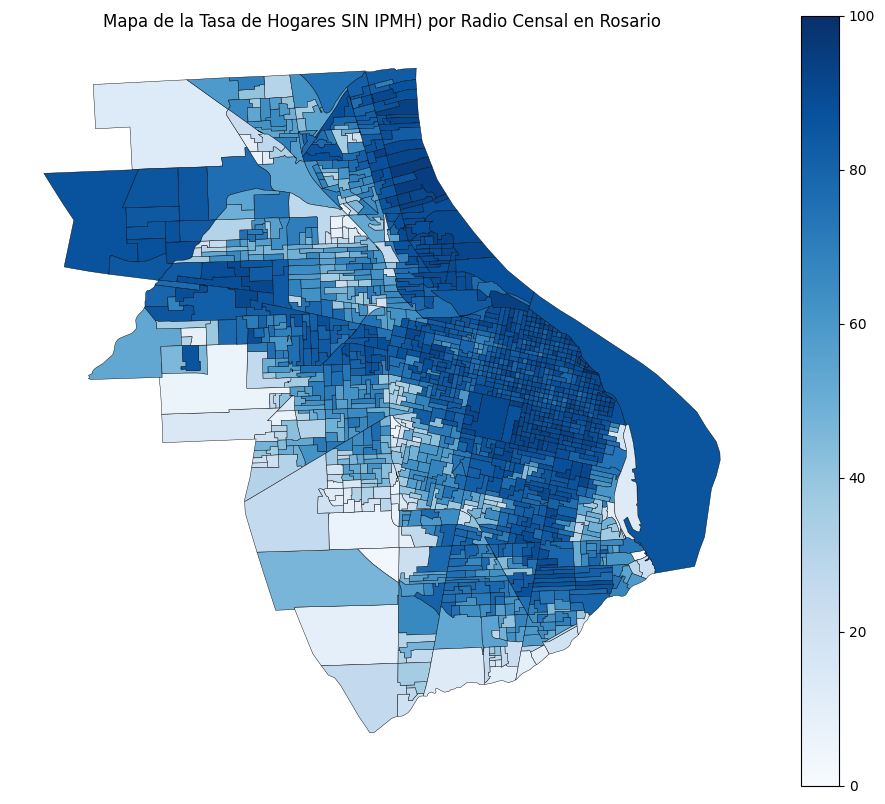

In [179]:
# 'tasa_Sin_IPMH_%'
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

datos_censales_con_gdf.plot(
    column='tasa_Sin_IPMH_%',          
    cmap='Blues',          
    legend=True,          
    edgecolor='black',
    linewidth=0.3,  
    ax=ax
)

ax.set_title("Mapa de la Tasa de Hogares SIN IPMH) por Radio Censal en Rosario")
ax.axis('off')
plt.show()

In [ ]:
# Descomentar para guardar el GeoDataFrame que fuimos modificando en pasos anteriores
# datos_censales_con_gdf.to_file('../data/processed/datos_censales_con_gdf.gpkg', driver='GPKG')

-----------

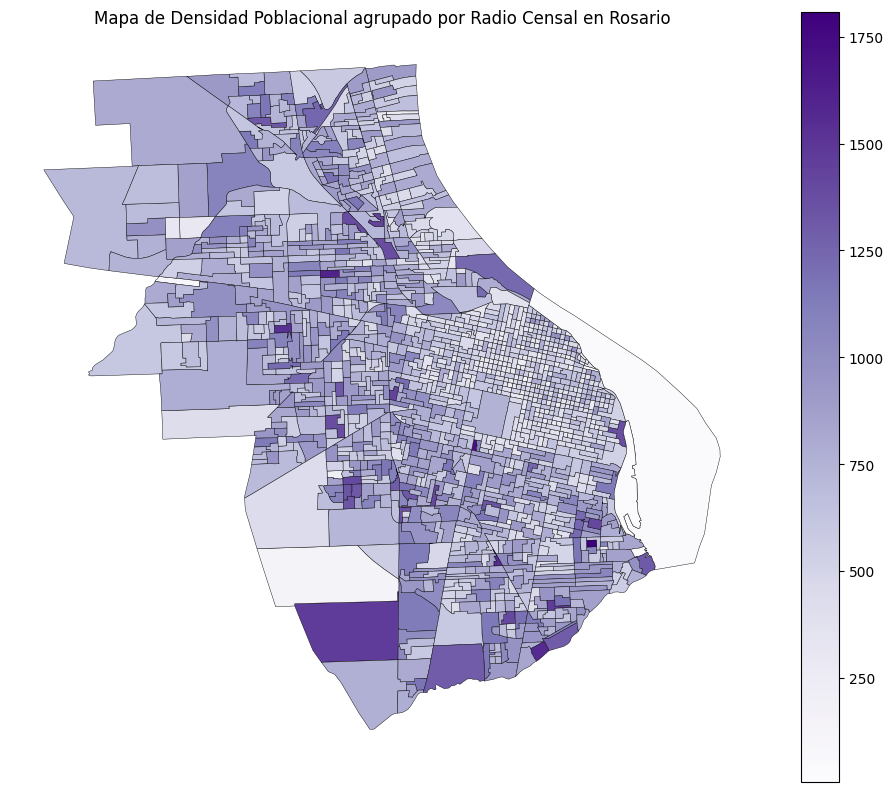

In [181]:
# Mapa densidad poblacional
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

datos_censales_con_gdf.plot(
    column='Total_Poblacion',          
    cmap='Purples',          
    legend=True,          
    edgecolor='black',
    linewidth=0.3,  
    ax=ax
)

ax.set_title("Mapa de Densidad Poblacional agrupado por Radio Censal en Rosario")
ax.axis('off')
plt.show()

In [182]:
#Sumamos la poblacion total de la ciudad de Rosario
datos_censales_con_gdf['Total_Poblacion'].sum()

1030069

>1.030.069 es la población total de la ciudad de Rosario según el úiltimo censo del 2022

-------------------

# Viviendas Unipersonales en la ciudad


Se crea una nueva variable que identifica los **hogares unipersonales**, es decir, aquellos conformados por una sola persona.

In [183]:
# Leemos total de poblacion agrupado por cantidad de personas que viven en el hogar
poblacion_hogares = pd.read_csv("../data/raw/poblacion_por_radio_censal.csv",header=0)

In [184]:
# Renombramos la columna 'Código' por 'CodigoRadioCensal'
poblacion_hogares = poblacion_hogares.rename(columns={'Código': 'CodigoRadioCensal'})

In [185]:
poblacion_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CodigoRadioCensal  1537 non-null   int64
 1   1                  1537 non-null   int64
 2   2                  1537 non-null   int64
 3   3                  1537 non-null   int64
 4   4                  1537 non-null   int64
 5   5                  1537 non-null   int64
 6   6                  1537 non-null   int64
 7   7                  1537 non-null   int64
 8   8                  1537 non-null   int64
 9   9                  1537 non-null   int64
 10  10                 1537 non-null   int64
 11  11                 1537 non-null   int64
 12  12                 1537 non-null   int64
 13  13                 1537 non-null   int64
 14  14                 1537 non-null   int64
 15  15                 1537 non-null   int64
 16  16                 1537 non-null   int64
 17  17            

In [186]:
# Nos interesan solamente las viviendas unipersonales (1 persona)
hogares_unipersonales = poblacion_hogares[['CodigoRadioCensal', '1']].copy()
hogares_unipersonales.rename(columns={'1': 'hogares_unipersonales'}, inplace=True)
hogares_unipersonales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   CodigoRadioCensal      1537 non-null   int64
 1   hogares_unipersonales  1537 non-null   int64
dtypes: int64(2)
memory usage: 24.1 KB


In [187]:
# Nos aseguramos que la columna CodigoRadioCensal sea del mismo tipo en ambos dataframes
datos_censales_con_gdf['CodigoRadioCensal'] = datos_censales_con_gdf['CodigoRadioCensal'].astype(int)
hogares_unipersonales['CodigoRadioCensal'] = hogares_unipersonales['CodigoRadioCensal'].astype(int)

# Hacemos el merge con datos_censales_con_gdf
datos_censales_con_gdf = datos_censales_con_gdf.merge(
    hogares_unipersonales,
    on='CodigoRadioCensal',
    how='left'
)

In [188]:
datos_censales_con_gdf.columns

Index(['NOMPROV', 'PROV', 'NOMDEPTO', 'DEPTO', 'FRAC', 'RADIO', 'TIPO', 'LINK',
       'OBS2020', 'geometry', 'CodigoFraccion', 'CodigoRadioCensal',
       'NBI_Hacinamiento_Si', 'NBI_Hacinamiento_No', 'NBI_Vivienda_Si',
       'NBI_Vivienda_No', 'NBI_Sanitarias_Si', 'NBI_Sanitarias_No',
       'NBI_Escolaridad_Si', 'NBI_Escolaridad_No', 'NBI_Subsistencia_Si',
       'NBI_Subsistencia_No', 'NBI_Si', 'NBI_No', 'Sin_IPMH',
       'IPMH_Solo_Recursos_Corrientes', 'IPMH_Solo_Recursos_Patrimoniales',
       'IPMH_Convergente', 'Total Hogares', 'Total_Poblacion', 'tasa_NBI_%',
       'NBI_Si_tasa_categorizado', 'tasa_NBI_hacinamiento_%',
       'tasa_NBI_vivienda_%', 'tasa_NBI_sanitarias_%',
       'tasa_NBI_escolaridad_%', 'tasa_NBI_subsistencia_%', 'tasa_Sin_IPMH_%',
       'tasa_Solo_Corriente_%', 'tasa_Solo_Patrimonial_%',
       'tasa_Convergente_%', 'hogares_unipersonales'],
      dtype='object')

In [189]:
# Revisamos
datos_censales_con_gdf[['CodigoRadioCensal', 'hogares_unipersonales', 'Total Hogares']].head(10)

CodigoRadioCensal  hogares_unipersonales  Total Hogares
0          820840301                     60            267
1          820840302                     39            285
2          820840303                     50            240
3          820840304                     97            439
4          820840305                     62            243
5          820840306                     54            351
6          820840307                     18            201
7          820840308                     61            230
8          820840309                     18            207
9          820840310                     31            232

Listo, ya tenemos la cantidad de hogares unipersonales que hay en cada radio censal

In [190]:
# Veamos los radios censales con mayor cantidad de hogares unipersonales
top_hogares_unipersonales = datos_censales_con_gdf.sort_values(by='hogares_unipersonales', ascending=False).head(20)
top_hogares_unipersonales[['CodigoRadioCensal', 'hogares_unipersonales', 'Total Hogares']]

CodigoRadioCensal  hogares_unipersonales  Total Hogares
557          820842409                    339            579
583          820842512                    265            503
466          820841903                    257            508
534          820842312                    254            482
464          820841901                    254            494
21           820842003                    253            528
444          820841805                    247            465
529          820842307                    242            476
446          820841807                    242            489
518          820842212                    239            471
536          820842314                    236            455
597          820842610                    235            437
378          820841501                    231            569
499          820842114                    228            485
965          820844003                    225            462
553          820842405                    224            380
436          820841724                    221            324
516          820842210                    221            428
475          820841912                    220            413
41           820842104                    220            490

In [191]:
# Vemos cantidad de hogares unipersonales en toda la ciudad
total_hogares_unipersonales = datos_censales_con_gdf['hogares_unipersonales'].sum()
print(f"Total de hogares unipersonales en Rosario: {total_hogares_unipersonales}")

Total de hogares unipersonales en Rosario: 123858


In [192]:
# Vemos total de hogares en toda la ciudad
total_hogares = datos_censales_con_gdf['Total Hogares'].sum()
print(f"Total de hogares en Rosario: {total_hogares}")

Total de hogares en Rosario: 402085


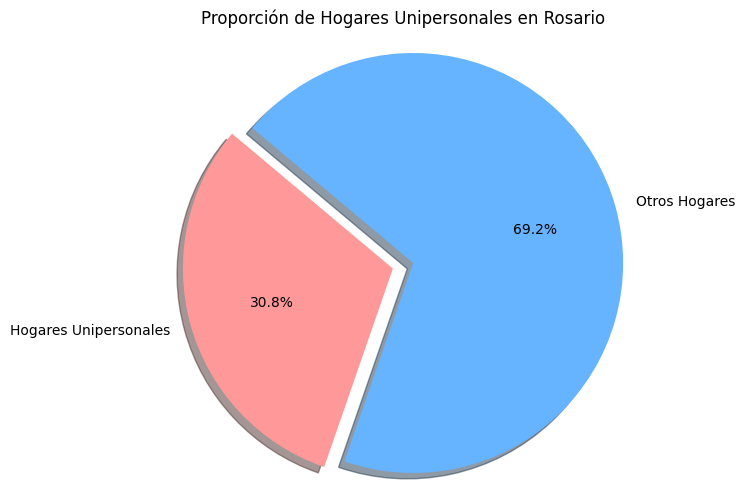

In [193]:
# Graficamos total de hogares unipersonales respecto al total de hogares en la ciudad
labels = ['Hogares Unipersonales', 'Otros Hogares']
sizes = [total_hogares_unipersonales, total_hogares - total_hogares_unipersonales]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # solo "explota" la primera porción
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proporción de Hogares Unipersonales en Rosario')
plt.axis('equal')  # Igual proporción para que el pie sea un círculo
plt.show()

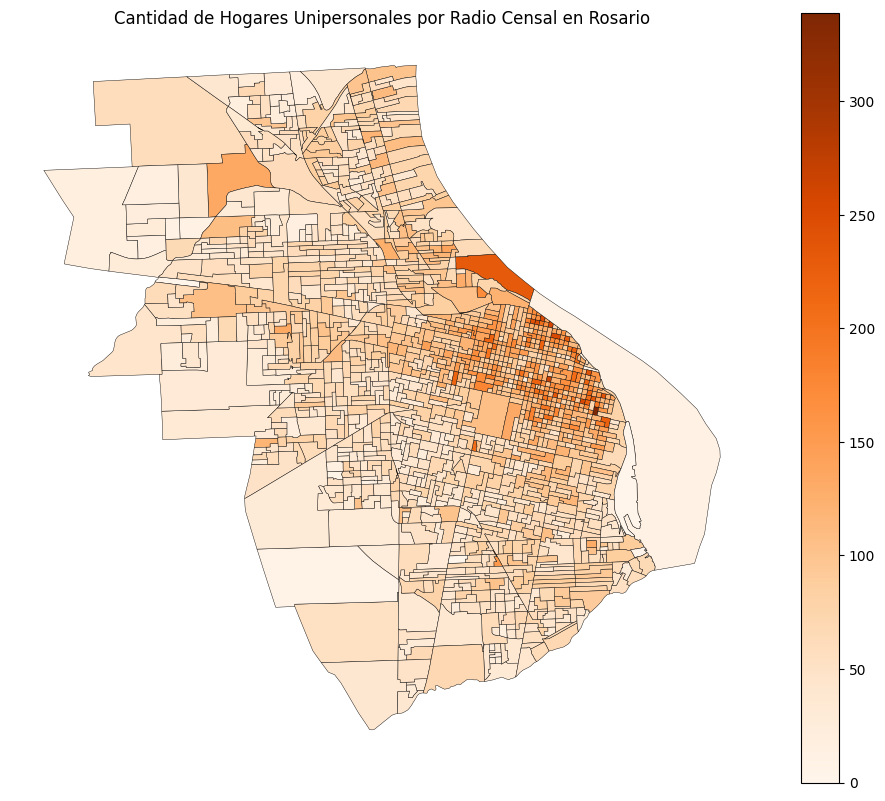

In [194]:
# Graficamos cantidad de hogares unipersonales por radio censal del centro
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
datos_censales_con_gdf.plot(
    column='hogares_unipersonales',          
    cmap='Oranges',          
    legend=True,          
    edgecolor='black',
    linewidth=0.3,  
    ax=ax
)   
ax.set_title("Cantidad de Hogares Unipersonales por Radio Censal en Rosario")
ax.axis('off')
plt.show()

In [ ]:
# Calculamos la tasa de hogares unipersonales por radio censal
datos_censales_con_gdf['tasa_hogares_unipersonales_%'] = (
    datos_censales_con_gdf['hogares_unipersonales'] / datos_censales_con_gdf['Total Hogares']) * 100

In [200]:
# Renombramos la columna para que sea más clara
datos_censales_con_gdf.rename(columns={'Total Hogares': 'Total_Hogares'}, inplace=True)

In [201]:
# Vemos los hogares con mayor tasa de hogares unipersonales
top_tasa_hogares_unipersonales = datos_censales_con_gdf.sort_values(
    by='tasa_hogares_unipersonales_%', ascending=False).head(20)
top_tasa_hogares_unipersonales[['CodigoRadioCensal', 'tasa_hogares_unipersonales_%', 'hogares_unipersonales', 'Total_Hogares']]

CodigoRadioCensal  tasa_hogares_unipersonales_%  hogares_unipersonales  \
436           820841724                     68.209877                    221   
594           820842607                     66.375546                    152   
1356          820848037                     65.517241                    152   
709           820842927                     64.968153                    204   
505           820842120                     64.361702                    121   
717           820842935                     63.255814                    136   
591           820842604                     62.820513                     98   
439           820841727                     62.325581                    134   
1318          820845601                     61.904762                     13   
971           820844009                     61.458333                    118   
502           820842117                     61.363636                    135   
39            820842102                     61.349693                    100   
483           820841920                     61.111111                    176   
968           820844006                     61.016949                    108   
425           820841713                     61.016949                    108   
426           820841714                     60.606061                    140   
460           820841821                     60.287081                    126   
438           820841726                     59.913793                    139   
686           820842904                     59.883721                    103   
664           820842816                     59.868421                     91   

      Total_Hogares  
436             324  
594             229  
1356            232  
709             314  
505             188  
717             215  
591             156  
439             215  
1318             21  
971             192  
502             220  
39              163  
483             288  
968             177  
425             177  
426             231  
460             209  
438             232  
686             172  
664             152

> Notar como la mayor cantidad de **hogares unipersonales** se concentra en el CENTRO de la ciudad.

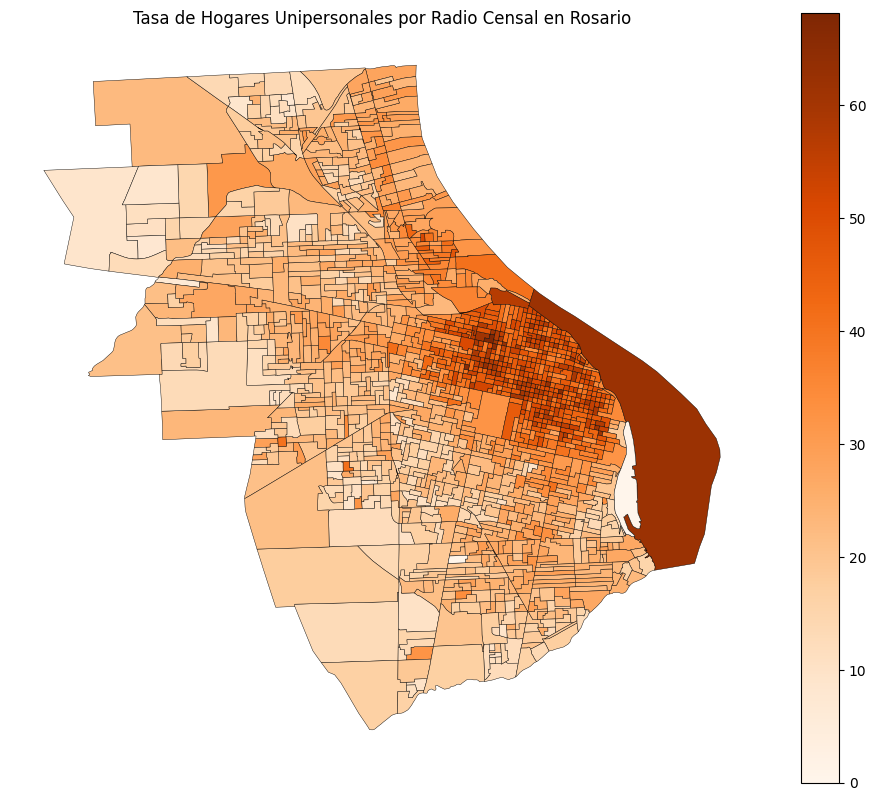

In [204]:
# Graficamos cantidad de hogares unipersonales por radio censal del centro
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
datos_censales_con_gdf.plot(
    column='tasa_hogares_unipersonales_%',          
    cmap='Oranges',          
    legend=True,          
    edgecolor='black',
    linewidth=0.3,  
    ax=ax
)   
ax.set_title("Tasa de Hogares Unipersonales por Radio Censal en Rosario")
ax.axis('off')
plt.show()

--------

In [ ]:
# Descomentar para guardar el GeoDataFrame que fuimos modificando en pasos anteriores
# datos_censales_con_gdf.to_file('../data/processed/datos_censales_con_gdf.gpkg', driver='GPKG')